# ***EXPLORATORY DATA ANALYSIS***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## *Idol Analysis*

In [ ]:
df_idols = pd.read_csv('kpop_idols.csv')
display(df_idols)

Stage Name      Full Name Korean Name  ... Gender      Debut  Company
0           A.M  Seong Hyunwoo         성현우  ...      M        NaN      NaN
1           Ace  Jang Wooyoung         장우영  ...      M        NaN      NaN
2          Aeji      Kwon Aeji         권애지  ...      F        NaN      NaN
3       Agust D     Min Yoongi         NaN  ...      M  8/15/2016  Big Hit
4          AhIn       Lee Ahin         이아인  ...      F        NaN      NaN
...         ...            ...         ...  ...    ...        ...      ...
1308        Ziu    Park Heejun         박희준  ...      M        NaN      NaN
1309         ZN      Bae Jinye         배진예  ...      F        NaN      NaN
1310        Zoa     Cho Hyewon         조혜원  ...      F        NaN      NaN
1311       Zuho       Bae Juho         백주호  ...      M        NaN      NaN
1312       Zuny      Kim Joomi         김주미  ...      F        NaN      NaN

[1313 rows x 12 columns]

In [ ]:
df_idols = df_idols.drop(['Korean Name', 'K. Stage Name','Birthplace'],axis=1)
display(df_idols)

Stage Name      Full Name Date of Birth  ... Gender      Debut  Company
0           A.M  Seong Hyunwoo    12/31/1996  ...      M        NaN      NaN
1           Ace  Jang Wooyoung     8/28/1992  ...      M        NaN      NaN
2          Aeji      Kwon Aeji    10/25/1999  ...      F        NaN      NaN
3       Agust D     Min Yoongi      3/9/1993  ...      M  8/15/2016  Big Hit
4          AhIn       Lee Ahin     9/27/1999  ...      F        NaN      NaN
...         ...            ...           ...  ...    ...        ...      ...
1308        Ziu    Park Heejun     6/16/1997  ...      M        NaN      NaN
1309         ZN      Bae Jinye      6/9/1994  ...      F        NaN      NaN
1310        Zoa     Cho Hyewon     5/31/2005  ...      F        NaN      NaN
1311       Zuho       Bae Juho      7/4/1996  ...      M        NaN      NaN
1312       Zuny      Kim Joomi     12/8/1994  ...      F        NaN      NaN

[1313 rows x 9 columns]

In [ ]:
missingsum=df_idols.isnull().sum()
missingsum
#to check the missing values

Stage Name          0
Full Name           6
Date of Birth       1
Group              93
Country             0
Other Group      1191
Gender              0
Debut            1301
Company          1301
dtype: int64

In [ ]:
df_idols[df_idols['Full Name'].isnull()]

Stage Name Full Name Date of Birth  ... Gender Debut Company
311       Harin       NaN    11/21/1995  ...      F   NaN     NaN
443        Isol       NaN      5/1/1997  ...      F   NaN     NaN
531      Jinhui       NaN    11/21/1996  ...      F   NaN     NaN
766        Mini       NaN     6/12/2000  ...      F   NaN     NaN
1215    Yeryung       NaN     6/22/2002  ...      F   NaN     NaN
1249     Yoonji       NaN     7/21/1998  ...      F   NaN     NaN

[6 rows x 9 columns]

In [ ]:
df_idols[df_idols['Group'].isnull()]

Stage Name      Full Name Date of Birth  ... Gender     Debut Company
8         Ailee      Lee Yejin     5/30/1989  ...      F  2/9/2012     YMC
11        AleXa       Kim Seri     12/6/1996  ...      F       NaN     NaN
17        Arang     Son Mnjung      3/8/2000  ...      F       NaN     NaN
31          B.I     Kim Hanbin    10/22/1996  ...      M       NaN     NaN
43        Bekah    Rebecca Kim     8/11/1989  ...      F       NaN     NaN
...         ...            ...           ...  ...    ...       ...     ...
1246    Yoonbin     Ha Yoonbin    12/11/2000  ...      M       NaN     NaN
1252    Yoosung  Jeong Yoosung     10/8/1992  ...      M       NaN     NaN
1263    Youngji    Hur Youngji     8/30/1994  ...      F       NaN     NaN
1283     Yulhee     Kim Yulhee    11/27/1997  ...      F       NaN     NaN
1304       Z-UK  Jeong Jaewook     1/27/1993  ...      M       NaN     NaN

[93 rows x 9 columns]

While checking if there is any missing values, we saw that 6 entries are missing full name feature, which is unexpected. So we checked those values and most of them are a member of a group called "Lusty".

### *Foreign Idol Analysis*

In [ ]:
df_idols['Country'].nunique()

13

In [ ]:
nationalities=df_idols['Country'].value_counts(ascending=False)
nationalities

South Korea    1206
China            39
Japan            27
USA              14
Thailand          6
Taiwan            6
Canada            5
Hong Kong         4
Indonesia         2
Malaysia          1
Philippines       1
Australia         1
America           1
Name: Country, dtype: int64

In [ ]:
df_idols[df_idols['Country']== 'Australia']

Stage Name  Full Name Date of Birth  ... Gender Debut Company
39  Bang Chan  Bang Chan     10/3/1997  ...      M   NaN     NaN

[1 rows x 9 columns]

Kpop idols came from 12 different nationalities, let's visualize what we have.

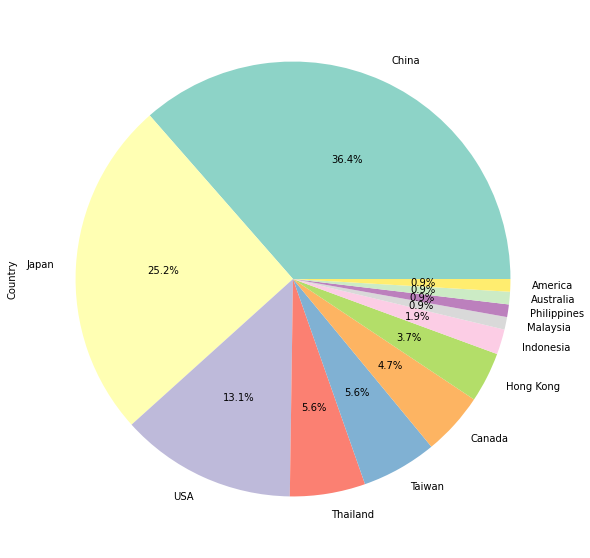

In [ ]:
nationalities.tail(12).plot(kind='pie',autopct='%1.1f%%',figsize=(10,10),colormap='Set3');

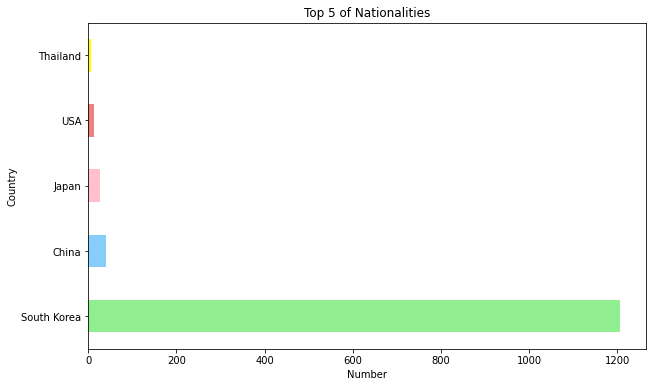

In [ ]:
colors = ['lightgreen','lightskyblue', 'pink', 'lightcoral', 'yellow' ]
top3 = nationalities.head(5)
top3.plot(kind='barh', figsize=(10, 6), color = colors)
plt.xlabel('Number')
plt.ylabel('Country')
plt.title("Top 5 of Nationalities")
plt.show()

To make our pie chart look less cluttered, we chose other nationalities rather than South Korea. It is because South Korean idols are the most common in the industry so their value count is much bigger than others. 

### *Gender Analysis*

In [ ]:
idol_gender = df_idols['Gender'].value_counts()
idol_gender

M    678
F    635
Name: Gender, dtype: int64

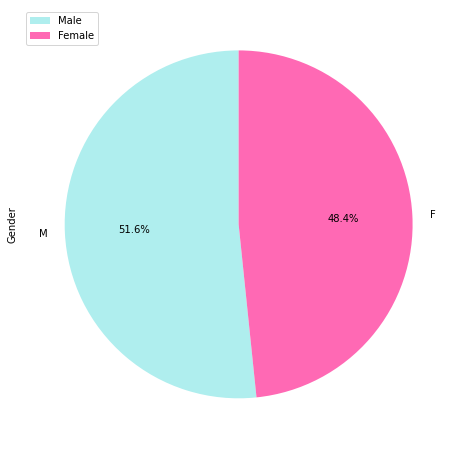

In [ ]:
color=['paleturquoise','hotpink']
idol_gender.plot(kind='pie',autopct='%1.1f%%',figsize=(8,8),colors=color,startangle=90)
plt.legend(labels=['Male', 'Female'], loc='upper left');


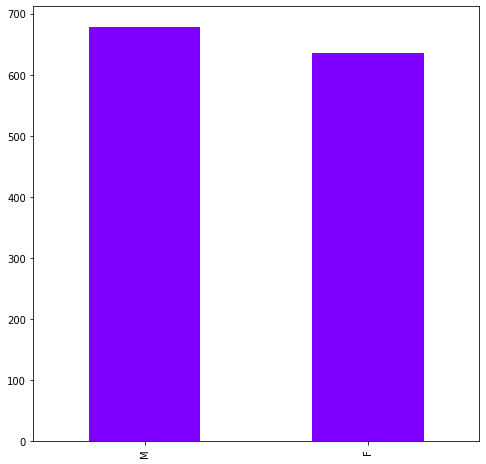

In [ ]:
idol_gender.plot(kind='bar',figsize=(8,8),cmap='rainbow');

The number of male idols are slightly bigger than females'.

### ***Age Analysis***

In [ ]:
from datetime import datetime
from datetime import date
today = date.today()

df_idols['Date of Birth']=pd.DatetimeIndex(df_idols['Date of Birth'])
df_idols['Debut']=pd.DatetimeIndex(df_idols['Debut'])
df_idols['Age'] = df_idols['Date of Birth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
df_idols['Experience'] = df_idols['Debut'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
df_idols

Stage Name      Full Name Date of Birth  ...  Company   Age Experience
0           A.M  Seong Hyunwoo    1996-12-31  ...      NaN  25.0        NaN
1           Ace  Jang Wooyoung    1992-08-28  ...      NaN  29.0        NaN
2          Aeji      Kwon Aeji    1999-10-25  ...      NaN  22.0        NaN
3       Agust D     Min Yoongi    1993-03-09  ...  Big Hit  28.0        5.0
4          AhIn       Lee Ahin    1999-09-27  ...      NaN  22.0        NaN
...         ...            ...           ...  ...      ...   ...        ...
1308        Ziu    Park Heejun    1997-06-16  ...      NaN  24.0        NaN
1309         ZN      Bae Jinye    1994-06-09  ...      NaN  27.0        NaN
1310        Zoa     Cho Hyewon    2005-05-31  ...      NaN  16.0        NaN
1311       Zuho       Bae Juho    1996-07-04  ...      NaN  25.0        NaN
1312       Zuny      Kim Joomi    1994-12-08  ...      NaN  27.0        NaN

[1313 rows x 11 columns]

In [ ]:
agemax=df_idols['Age'].max()
agemax

44.0

In [ ]:
df_idols[df_idols['Age']==44]

Stage Name     Full Name Date of Birth  ... Company   Age Experience
847        PSY  Park Jaesang    1977-12-31  ...     PSY  44.0       20.0

[1 rows x 11 columns]

The oldest idol in the industry is PSY and he is 44 years old.

In [ ]:
agemin=df_idols['Age'].min()
agemin

16.0

In [ ]:
df_idols[df_idols['Age']==16]

Stage Name     Full Name Date of Birth  ... Company   Age Experience
143      Dahyun  Jeong Dahyun    2005-04-29  ...     NaN  16.0        NaN
1216      Yeseo    Kang Yeseo    2005-08-22  ...     NaN  16.0        NaN
1310        Zoa    Cho Hyewon    2005-05-31  ...     NaN  16.0        NaN

[3 rows x 11 columns]

The youngest idols are 16 years old and most of them female.

In [ ]:
meanage=df_idols['Age'].mean()
meanage

25.554878048780488

As expected, idols are very young and their age mean is around 25.

In [ ]:
def generation(row):    
    if row['Age'] >= 41:
        return 'X'
    if (row['Age'] < 40) & (row['Age'] > 25):
        return 'Y'
    if (row['Age'] < 24) & (row['Age'] >15):
        return 'Z'
df_idols['Generation'] = df_idols.apply(lambda row: generation(row), axis=1)
generations=df_idols['Generation'].value_counts()
generations

Y    622
Z    460
X      2
Name: Generation, dtype: int64

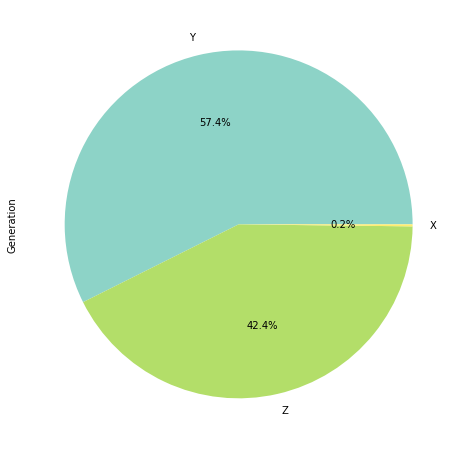

In [ ]:
generations.plot(kind='pie',autopct='%1.1f%%',figsize=(8,8),colormap='Set3');

We categorized the ages of idols into X, Y, Z. 
*   X generation is used for people who born between 1965-1980, so their age should be at least 41 today.
*   Y generation is used for people who born between 1981-1995, so their age range should be 25-40 nowadays.
*   Z generation is used for people who born between 1996-2013, so their age range is 8-24, but we only considered 15-24 since 8-15 years olds are not present in our dataset. 





## ***Group Analysis in K-Pop***

### Generations of Groups

In [ ]:
df_idols['Group'].nunique()

208

In [ ]:
soloIdols = df_idols[df_idols['Group'].isnull()]
len(soloIdols)

93

In [ ]:
df_girls=pd.read_csv('kpop_idols_girl_groups.csv')
df_boys=pd.read_csv('kpop_idols_boy_groups.csv')
df_boys['Debut year'] = pd.DatetimeIndex(df_boys['Debut']).year
df_girls['Debut year'] = pd.DatetimeIndex(df_girls['Debut']).year
def generation(row):    
    if (row['Debut year'] > 1991) & (row['Debut year'] < 2000):
        return '1st Generation'
    if (row['Debut year'] > 2001) & (row['Debut year'] < 2010):
        return '2nd Generation'
    if (row['Debut year'] > 2011) & (row['Debut year'] < 2018):
        return '3rd Generation'  
    if (row['Debut year'] > 2019) & (row['Debut year'] < 2022):
        return '4th Generation'      

In [ ]:
df_boys['Generation'] = df_boys.apply(lambda row: generation(row), axis=1)
df_boys['Generation'].value_counts() 

3rd Generation    84
2nd Generation    15
1st Generation     6
4th Generation     2
Name: Generation, dtype: int64

In [ ]:
df_girls['Generation'] = df_girls.apply(lambda row: generation(row), axis=1)
df_girls['Generation'].value_counts() 

3rd Generation    84
2nd Generation    14
1st Generation     2
4th Generation     2
Name: Generation, dtype: int64

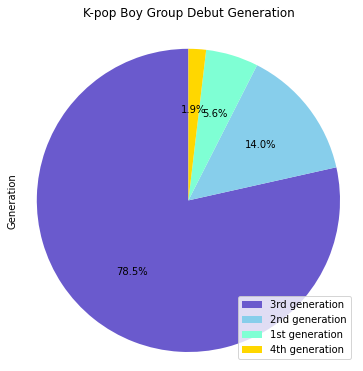

In [ ]:
colors_list = ['slateblue', 'skyblue', 'aquamarine','gold']
gen_b = df_boys['Generation'].value_counts() # Generation column
gen_b.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, colors=colors_list)
plt.title('K-pop Boy Group Debut Generation\n')
plt.axis('equal')
plt.legend(labels=['3rd generation','2nd generation', '1st generation', '4th generation'], loc='lower right') 
plt.show()

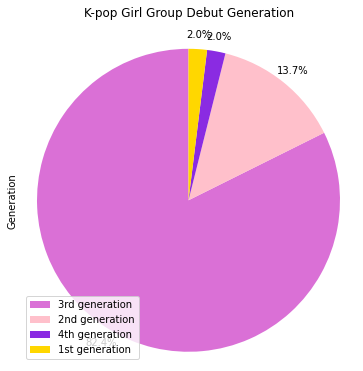

In [ ]:
colors_list = ['orchid', 'pink', 'blueviolet','gold']
gen_g = df_girls['Generation'].value_counts() # Generation column
gen_g.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, colors=colors_list,pctdistance=1.10)
plt.title('K-pop Girl Group Debut Generation\n')
plt.axis('equal')
plt.legend(labels=['3rd generation','2nd generation', '4th generation', '1st generation'], loc='lower left') 
plt.show()

Among the groups, the number of 3rd gen groups are the most. 4th gen groups are the least in both of boy and girl groups.

### Hiatus Analysis of Groups

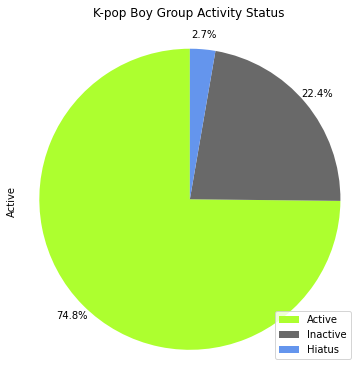

In [ ]:
colors_list = ['greenyellow','dimgray','cornflowerblue']
active_b = df_boys['Active'].value_counts() # Activity column
active_b.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.10, colors=colors_list)
plt.title('K-pop Boy Group Activity Status\n')
plt.axis('equal')
plt.legend(labels=['Active', 'Inactive', 'Hiatus'], loc='lower right') 
plt.show()

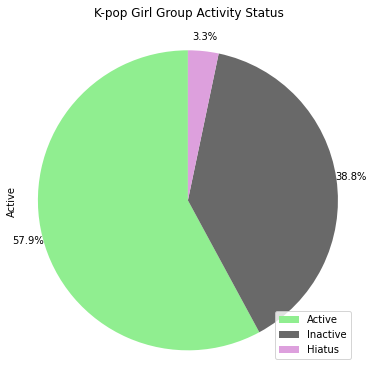

In [ ]:
colors_list = ['lightgreen','dimgray','plum']
g = df_girls['Active'].value_counts() # Activity column
g.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, labels=None, pctdistance=1.10, colors=colors_list)
plt.title('K-pop Girl Group Activity Status\n')
plt.axis('equal')
plt.legend(labels=['Active', 'Inactive', 'Hiatus'], loc='lower right') 
plt.show()

Girl groups are more likely to tend to go inactive or go on hiatus.

### ***Name Analysis of Kpop Groups***


Splitting Full Name into Name and Surname

In [ ]:
df_idols['Full Name'] = df_idols['Full Name'].astype(str)
df_idols['Surname'] = df_idols['Full Name'].apply(lambda x: x.split(' ')[0])
df_idols['First Name'] = df_idols['Full Name'].apply(lambda x: x.split(' ')[-1])

In [ ]:
df3=df_idols.copy()
def samename(row):
    if row['Stage Name'] == row['First Name'] :
        return 'Same'
    if row['Stage Name'] != row['First Name'] :
        return 'Different'
df3['Same'] = df3.apply(lambda row: samename(row), axis=1)
df3['Same'].value_counts()

Same         727
Different    586
Name: Same, dtype: int64

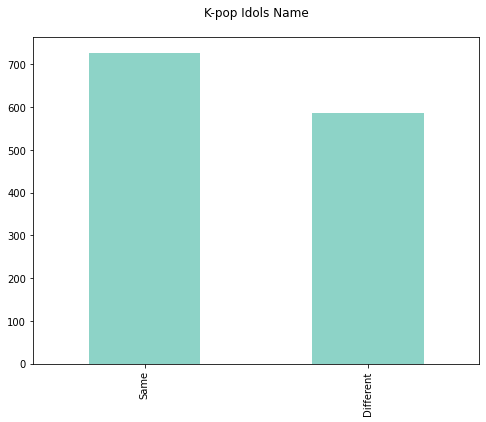

In [ ]:
same = df3['Same'].value_counts()
same.plot(kind='bar',figsize=(8, 6), cmap='Set3')
plt.title('K-pop Idols Name\n')
plt.show()

A fair enough of idols isn't using their Korean name.

## *Youtube Analysis*

### *YouTube Web Scraping*

In [ ]:
#Since it takes hours, uncommented.
"""
import requests
from bs4 import BeautifulSoup
def getViews (url):
    try:
        soup = BeautifulSoup(requests.get(url).text, 'lxml')
        view = soup.select_one('meta[itemprop="interactionCount"][content]')['content']
        print (view)
        return int(view)
    except:
        pass

import os
import glob
import pandas as pd
import numpy as np
youtube = pd.read_csv('E:/DataScience/youtube.csv')
newyoutube = youtube.groupby(['Track Name', 'Artist Names', 'YouTube URL'])['Views'].sum().reset_index()

flag = 0
for  index, url in enumerate(newyoutube['YouTube URL']):
    newyoutube.at[index,'Views'] = getViews (url)
    print (flag)
    flag +=1
    
newyoutube

newyoutube.to_csv(r'E:\DataScience\youtubescraped1.csv', index=False)



"""
print()

### *General Analysis and Rate*

In [ ]:
df_youtube=pd.read_csv('youtubescraped3.csv')
df_youtube["Artist"] = df_youtube["Artist"].str.strip()
df_youtube["Artist"] = df_youtube["Artist"].str.lower()
df_youtube

Song Name       Type  ...                         Video         Views
0              #A-Ya        Boy  ...  https://youtu.be/jCmaXx_hp3g  1.027610e+05
1        #Cookie Jar       Girl  ...  https://youtu.be/rRgTMs_bGuI  3.841032e+07
2           #Curious      Co-ed  ...  https://youtu.be/OslCGxAfNb0  3.289500e+05
3            #LoveMe       Girl  ...  https://youtu.be/UMOVGU-IyHY  9.892760e+05
4               #WYD        Boy  ...  https://youtu.be/hth1VQNPtj0  2.756141e+07
...              ...        ...  ...                           ...           ...
3752  yaya (Me Time)  Girl Solo  ...  https://youtu.be/BJD0arHF_5c  1.129198e+06
3753          yayaya       Girl  ...  https://youtu.be/sLfRdyqxXJk  1.446101e+06
3754   Gangnam Style   Boy Solo  ...                           NaN  4.318353e+09
3755       Gentleman   Boy Solo  ...                           NaN  1.462790e+09
3756           DADDY   Boy Solo  ...                           NaN  6.161742e+08

[3757 rows x 6 columns]

In [ ]:
release=df_youtube['Release'].value_counts()
release

Major       2787
Minor        514
Japanese     332
Special       61
CF            25
English       17
OST           16
Chinese        5
Name: Release, dtype: int64

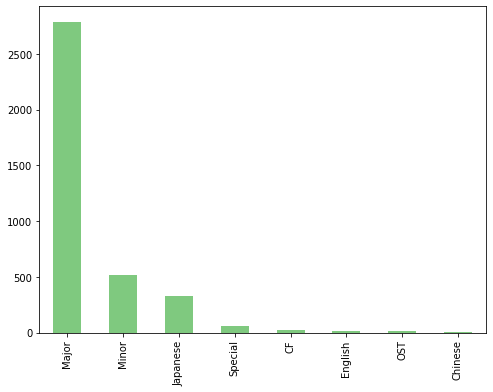

In [ ]:
release.plot(kind='bar',cmap='Accent',figsize=(8, 6));

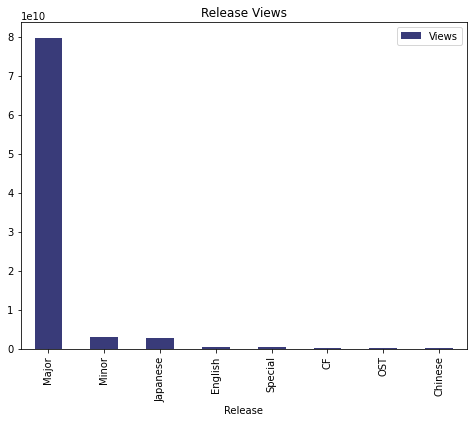

In [ ]:
release=df_youtube.groupby(by='Release').sum().sort_values(by=['Views'], ascending=False)
release.plot(kind='bar',y='Views',cmap='tab20b',title='Release Views',figsize=(8, 6));

In [ ]:
artistgrouped=df_youtube.groupby(by='Artist').sum().sort_values(by=['Views'], ascending=False)
artistgrouped

Views
Artist                 
bts        1.318952e+10
blackpink  7.520474e+09
psy        6.776564e+09
twice      6.013280e+09
exo        3.515687e+09
...                 ...
cici       0.000000e+00
chae yeon  0.000000e+00
bp rania   0.000000e+00
bnf        0.000000e+00
zzbae      0.000000e+00

[800 rows x 1 columns]

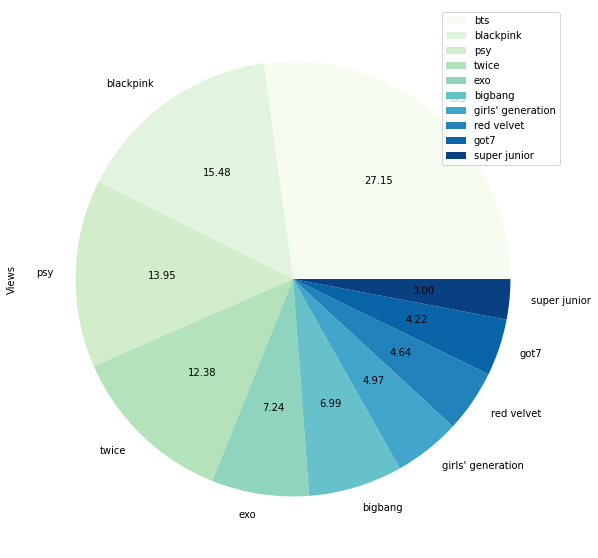

In [ ]:
artistgrouped1=artistgrouped.head(10)
artistgrouped1.plot(kind='pie',y='Views',cmap='GnBu',figsize=(10,10),autopct='%.2f');

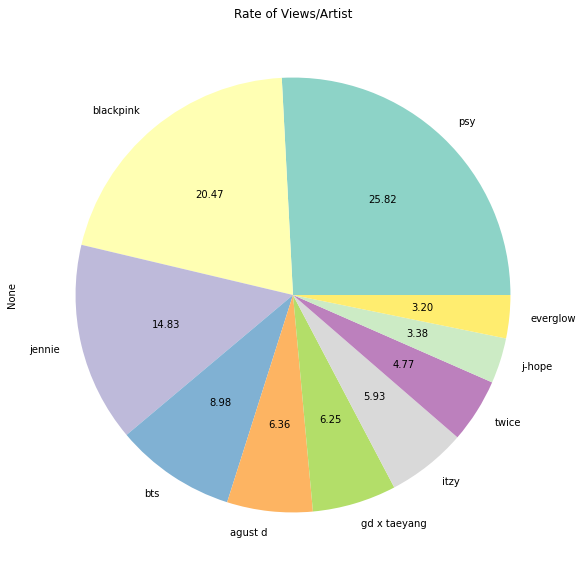

In [ ]:
artistgrouped=df_youtube['Artist'].value_counts()
views = df_youtube.groupby(by='Artist').sum()
rate=views['Views']/artistgrouped
rate=rate.sort_values(ascending=False)
rate=rate.head(10)
rate.plot(kind='pie',y='Views',cmap='Set3',figsize=(10,10),autopct='%.2f',title='Rate of Views/Artist');

### *Girl Groups and Female Soloists*

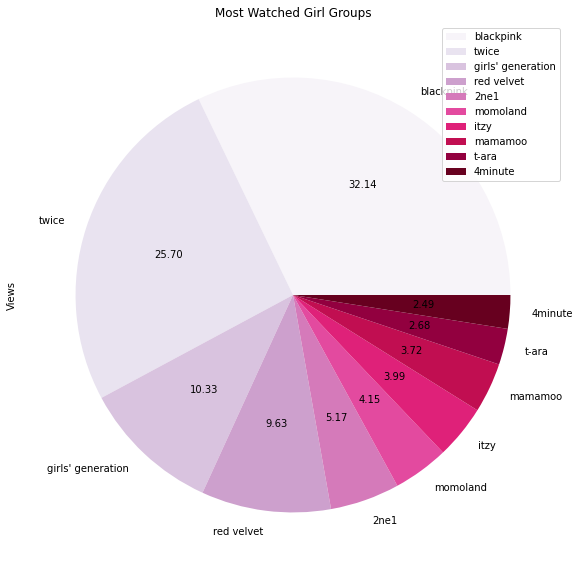

In [ ]:
girls=df_youtube.where(df_youtube['Type'] == 'Girl')
girls=girls[girls['Artist'].notna()]
girls=girls.groupby('Artist').sum()
girls=girls.sort_values(by='Views',ascending=False).head(10)
girls.plot(kind='pie',y='Views',cmap='PuRd',figsize=(10,10),autopct='%.2f',title='Most Watched Girl Groups');

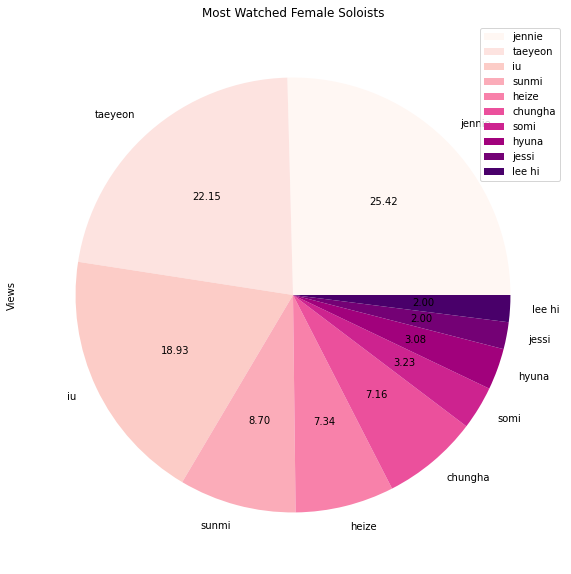

In [ ]:
sologirls=df_youtube.where(df_youtube['Type'] == 'Girl Solo')
sologirls=sologirls[sologirls['Artist'].notna()]
sologirls=sologirls.groupby('Artist').sum()
sologirls=sologirls.sort_values(by='Views',ascending=False).head(10)
sologirls.plot(kind='pie',y='Views',cmap='RdPu',figsize=(10,10),autopct='%.2f',title='Most Watched Female Soloists');

### *Boy Groups and Male Soloists*

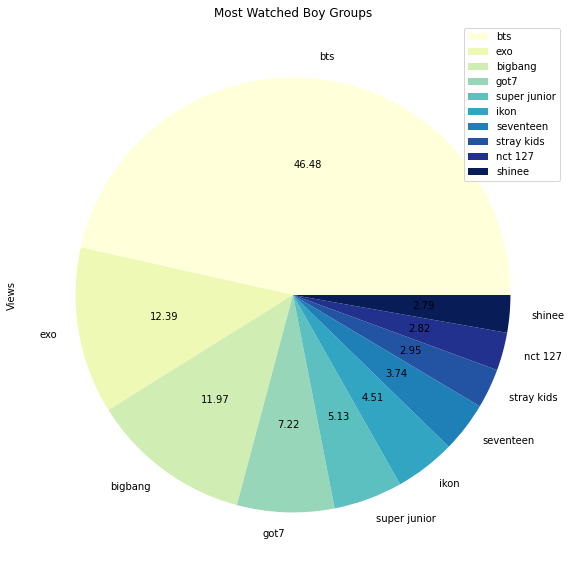

In [ ]:
boys=df_youtube.where(df_youtube['Type'] == 'Boy')
boys=boys[boys['Artist'].notna()]
boys=boys.groupby('Artist').sum()
boys=boys.sort_values(by='Views',ascending=False).head(10)
boys.plot(kind='pie',y='Views',cmap='YlGnBu',figsize=(10,10),autopct='%.2f',title='Most Watched Boy Groups');

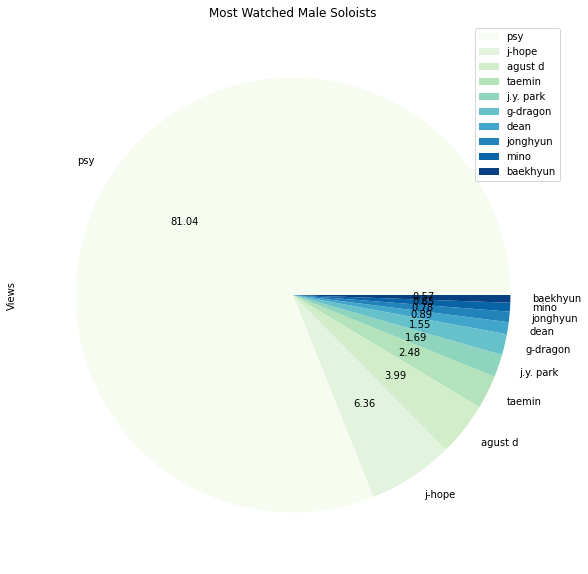

In [ ]:
soloboys=df_youtube.where(df_youtube['Type'] == 'Boy Solo')
soloboys=soloboys[soloboys['Artist'].notna()]
soloboys=soloboys.groupby('Artist').sum()
soloboys=soloboys.sort_values(by='Views',ascending=False).head(10)
soloboys.plot(kind='pie',y='Views',cmap='GnBu',figsize=(10,10),autopct='%.2f',title='Most Watched Male Soloists');

### *Other criterias*

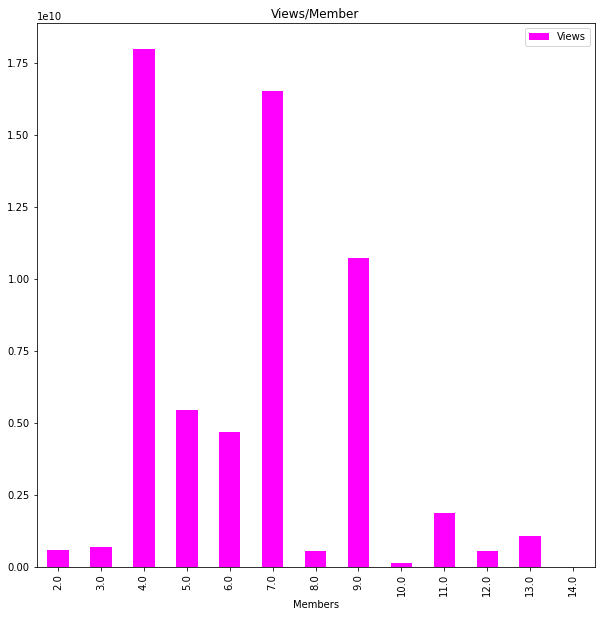

In [ ]:
df_analyze=pd.read_csv('fordecisiontree.csv')
df_analyze=df_analyze.groupby(by='Members').sum()
df_analyze.plot(kind='bar',y='Views',cmap='spring',figsize=(10,10),title='Views/Member');

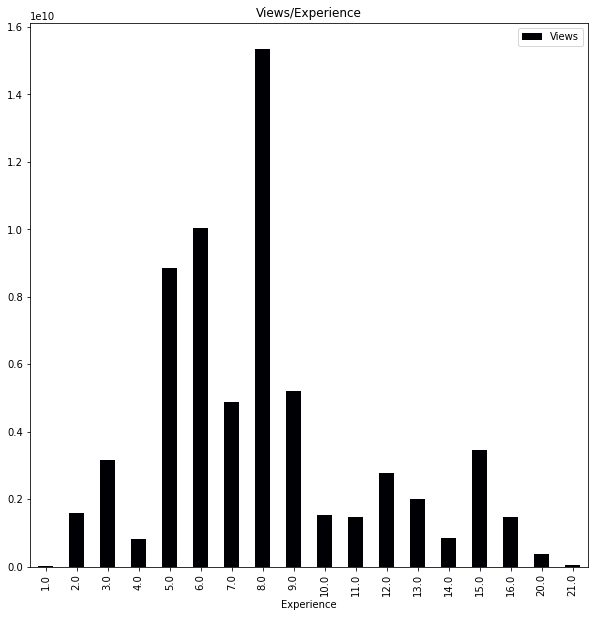

In [ ]:
df_analyze=pd.read_csv('fordecisiontree.csv')
df_analyze=df_analyze.groupby(by='Experience').sum()
df_analyze.plot(kind='bar',y='Views',cmap='inferno',figsize=(10,10),title='Views/Experience');

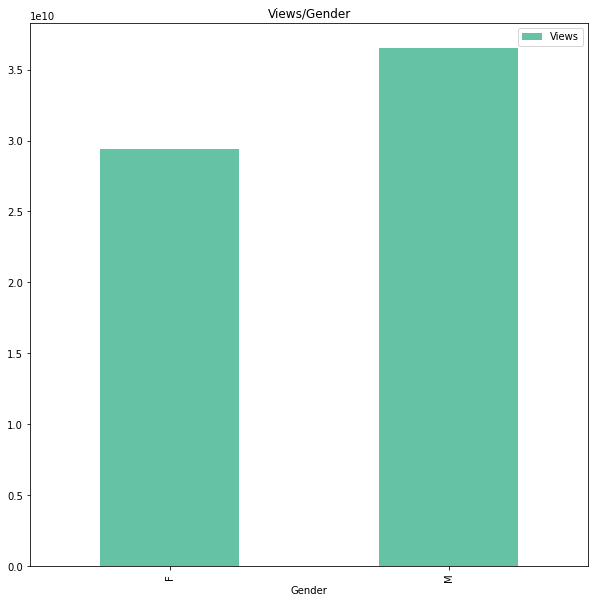

In [ ]:
df_analyze=pd.read_csv('fordecisiontree.csv')
df_analyze=df_analyze.groupby(by='Gender').sum()
df_analyze.plot(kind='bar',y='Views',cmap='Set2',figsize=(10,10),title='Views/Gender');

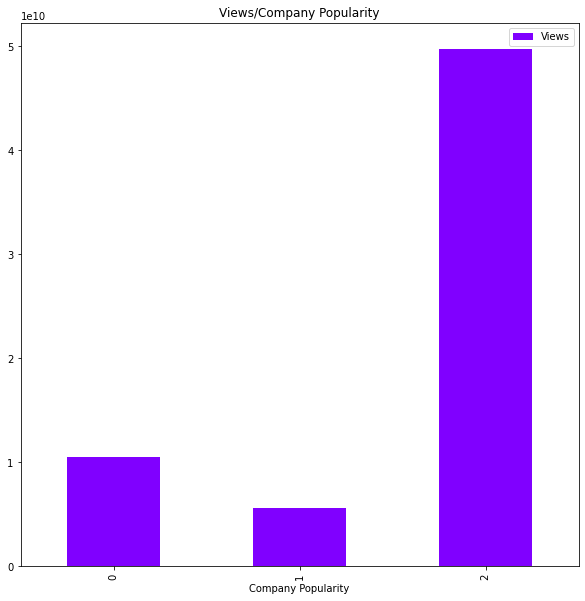

In [ ]:
df_analyze=pd.read_csv('fordecisiontree.csv')
df_analyze=df_analyze.groupby(by='Company Popularity').sum()
df_analyze.plot(kind='bar',y='Views',cmap='rainbow',figsize=(10,10),title='Views/Company Popularity');

## *Spotify Analysis*

### *Kpop Hits 1990-2020 Dataset Analysis*

In [ ]:
# Making a dictionary for the labels and csv files related to them.
# Here the key part represents the year and value is the name of the dataset.
head = "KPopHits" 
tail = ".csv"
labels = {}    

for x in range(22):
    if x == 0:
        j = 90
        labels[str(j)] = head + str(j) + "s" + tail
    elif x > 0 and x < 11:
        if x == 1:
            j = 0
        labels["200" + str(j)] =  head + "200" + str(j) + tail
    else:
        labels["20" + str(j)] =  head + "20" + str(j) + tail
    
    if x != 0:
        j += 1

print(labels)

{'90': 'KPopHits90s.csv', '2000': 'KPopHits2000.csv', '2001': 'KPopHits2001.csv', '2002': 'KPopHits2002.csv', '2003': 'KPopHits2003.csv', '2004': 'KPopHits2004.csv', '2005': 'KPopHits2005.csv', '2006': 'KPopHits2006.csv', '2007': 'KPopHits2007.csv', '2008': 'KPopHits2008.csv', '2009': 'KPopHits2009.csv', '2010': 'KPopHits2010.csv', '2011': 'KPopHits2011.csv', '2012': 'KPopHits2012.csv', '2013': 'KPopHits2013.csv', '2014': 'KPopHits2014.csv', '2015': 'KPopHits2015.csv', '2016': 'KPopHits2016.csv', '2017': 'KPopHits2017.csv', '2018': 'KPopHits2018.csv', '2019': 'KPopHits2019.csv', '2020': 'KPopHits2020.csv'}


In [ ]:
# Making a dictionary for the datasets and printing one of them
dfs = {} #

key_list = list(labels.keys())
val_list = list(labels.values())
for x in range(22):
    dfs[key_list[x]] = pd.read_csv(val_list[x])

dfs['2020']

Unnamed: 0  ... time_signature
0            0  ...              4
1            1  ...              4
2            2  ...              4
3            3  ...              4
4            4  ...              4
5            5  ...              4
6            6  ...              4
7            7  ...              4
8            8  ...              4
9            9  ...              4
10          10  ...              4
11          11  ...              4
12          12  ...              4
13          13  ...              4
14          14  ...              4
15          15  ...              4
16          16  ...              4
17          17  ...              4
18          18  ...              4
19          19  ...              4
20          20  ...              4
21          21  ...              4
22          22  ...              4
23          23  ...              4
24          24  ...              4
25          25  ...              4
26          26  ...              4
27          27  ...              4
28          28  ...              4
29          29  ...              4
30          30  ...              4
31          31  ...              4
32          32  ...              4
33          33  ...              4
34          34  ...              4
35          35  ...              4
36          36  ...              4
37          37  ...              4
38          38  ...              4
39          39  ...              4
40          40  ...              4
41          41  ...              4
42          42  ...              4
43          43  ...              4
44          44  ...              4
45          45  ...              4
46          46  ...              4
47          47  ...              4
48          48  ...              4
49          49  ...              4

[50 rows x 14 columns]

In [ ]:
# Features of the dataset
dfs['2020'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   title           50 non-null     object 
 2   artist/s        50 non-null     object 
 3   danceability    50 non-null     float64
 4   energy          50 non-null     float64
 5   key             50 non-null     int64  
 6   loudness        50 non-null     float64
 7   mode            50 non-null     int64  
 8   speechiness     50 non-null     float64
 9   acousticness    50 non-null     float64
 10  valence         50 non-null     float64
 11  tempo           50 non-null     float64
 12  duration_ms     50 non-null     int64  
 13  time_signature  50 non-null     int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 5.6+ KB


In [ ]:
#danceability in the 2020

dfs['2020'].agg({"danceability": ["mean", "std", "median"]})

danceability
mean        0.681500
std         0.095006
median      0.688000

In [ ]:
#energy in the 2020 

dfs['2020'].agg({"energy": ["mean", "std", "median"]})

energy
mean    0.834260
std     0.082595
median  0.841000

In [ ]:
#the keys used in the 2020 

dfs['2020']["key"].mode()

0    2
1    9
dtype: int64

In [ ]:
dfs['2020'].agg({"key": ["std"]})

key
std  3.417183

In [ ]:
#loudness in the 2020 

dfs['2020'].agg({"loudness": ["mean", "std", "median"]})

loudness
mean   -3.499060
std     1.546105
median -3.577500

In [ ]:
#the modes used in the 2020 

dfs['2020']["mode"].mode()

0    0
dtype: int64

In [ ]:
dfs['2020'].agg({"mode": ["std"]})

mode
std  0.503457

In [ ]:
#acousticness in the 2020 

dfs['2020'].agg({"acousticness": ["mean", "std", "median"]})

acousticness
mean        0.090657
std         0.087299
median      0.061550

In [ ]:
#valence in the 2020 

dfs['2020'].agg({"valence": ["mean", "std", "median"]})

valence
mean    0.579360
std     0.172439
median  0.578000

In [ ]:
#tempo in the 2020 

dfs['2020'].agg({"tempo": ["mean", "std", "median"]})

tempo
mean    124.321000
std      21.249983
median  120.458500

In [ ]:
#the duration (in milliseconds) in the 2020 

dfs['2020'].agg({"duration_ms": ["mean", "std", "median"]})

duration_ms
mean    202255.640000
std      21172.276791
median  201773.000000

In [ ]:
#the time signatures used in the 2020 

dfs['2020']["time_signature"].mode()

0    4
dtype: int64

In [ ]:
dfs['2020'].agg({"time_signature": ["std"]})

time_signature
std             0.0

Combination of all necessary data

In [ ]:
for x in range(22): 
    if x == 0:
        period_column = '1990s'
    else:
        period_column = key_list[x]
    danceability_column = dfs[key_list[x]]['danceability'].mean()
    energy_column = dfs[key_list[x]]['energy'].mean()
    loudness_column = dfs[key_list[x]]['loudness'].mean()
    speechiness_column = dfs[key_list[x]]['speechiness'].mean()
    acousticness_column = dfs[key_list[x]]['acousticness'].mean()
    valence_column = dfs[key_list[x]]['valence'].mean()
    tempo_column = dfs[key_list[x]]['tempo'].mean()
    duration_ms_column = dfs[key_list[x]]['duration_ms'].mean()
        
    if x == 0:
        hits_df = pd.DataFrame({'period': [period_column], 'danceability': [danceability_column], 'energy': [energy_column], 'loudness': [loudness_column], 'speechiness': [speechiness_column], 'acousticness': [acousticness_column], 'valence': [valence_column], 'tempo': [tempo_column], 'duration_ms': [duration_ms_column]})
    else:
        row = pd.Series([period_column, danceability_column, energy_column, loudness_column, speechiness_column, acousticness_column, valence_column, tempo_column, duration_ms_column], index=hits_df.columns)
        hits_df = hits_df.append(row, ignore_index=True)
        
hits_df

period  danceability    energy  ...   valence       tempo    duration_ms
0   1990s      0.629100  0.655300  ...  0.561500  119.346100  247164.950000
1    2000      0.605633  0.676100  ...  0.545703  127.925267  242037.000000
2    2001      0.606233  0.616100  ...  0.475223  121.768167  250539.533333
3    2002      0.606867  0.590300  ...  0.464320  116.104433  250075.233333
4    2003      0.625207  0.622586  ...  0.497379  117.127552  241214.931034
5    2004      0.613828  0.652379  ...  0.557000  124.818310  239455.344828
6    2005      0.576103  0.617448  ...  0.415359  112.822000  246685.724138
7    2006      0.591033  0.611867  ...  0.421200  115.616700  250556.566667
8    2007      0.604250  0.674071  ...  0.489671  118.306500  246071.571429
9    2008      0.651586  0.706966  ...  0.574014  127.453724  237950.000000
10   2009      0.665172  0.699276  ...  0.577483  127.232931  227118.379310
11   2010      0.676103  0.767690  ...  0.534966  124.495621  217861.344828
12   2011      0.634655  0.709345  ...  0.519034  127.510621  227956.206897
13   2012      0.668433  0.761567  ...  0.572153  122.648033  225675.266667
14   2013      0.668000  0.752655  ...  0.628828  119.497448  214985.931034
15   2014      0.602933  0.652920  ...  0.481733  117.913900  224875.633333
16   2015      0.653633  0.784867  ...  0.629000  127.989333  209182.933333
17   2016      0.622000  0.655867  ...  0.505933  113.338167  222182.966667
18   2017      0.683800  0.764860  ...  0.572200  119.242660  211356.460000
19   2018      0.677403  0.754273  ...  0.554740  118.079195  213543.870130
20   2019      0.694360  0.771680  ...  0.577820  123.067040  208355.340000
21   2020      0.681500  0.834260  ...  0.579360  124.321000  202255.640000

[22 rows x 9 columns]

Change in K-Pop tune throughout the years


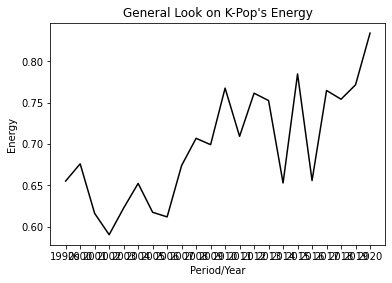

In [ ]:
#Energy over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["energy"]
plt.plot(x, y, color='black')
plt.title("General Look on K-Pop's Energy")
plt.xlabel("Period/Year")
plt.ylabel("Energy")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()

Especially 4th gen groups debut, energy is increasing.

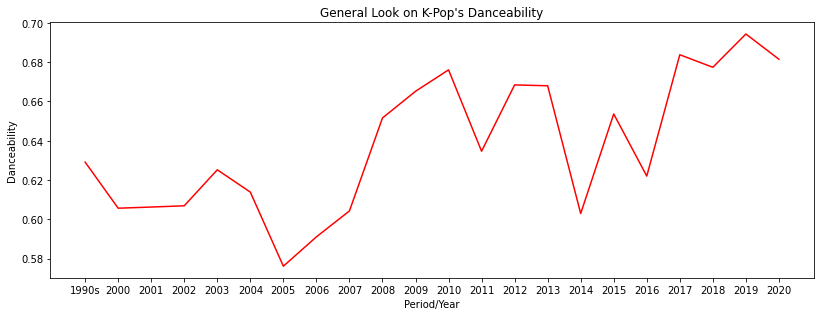

In [ ]:
#Danceability over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["danceability"]
plt.plot(x, y, color='red')
plt.title("General Look on K-Pop's Danceability")
plt.xlabel("Period/Year")
plt.ylabel("Danceability")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

Danceability is increasing with respect of rising tempo and energy.

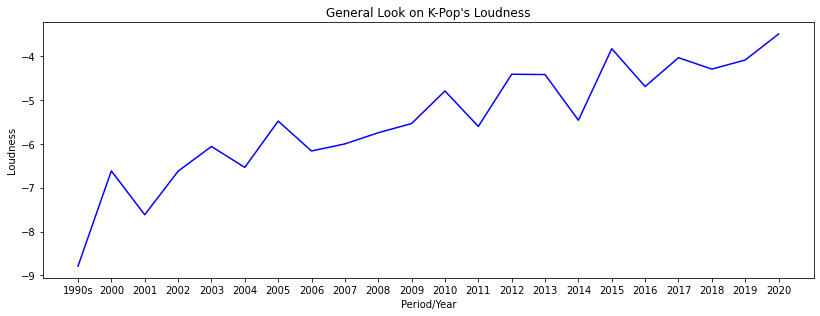

In [ ]:
#Loudness over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["loudness"]
plt.plot(x, y, color='blue')
plt.title("General Look on K-Pop's Loudness")
plt.xlabel("Period/Year")
plt.ylabel("Loudness")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()


Kpop is getting louder, because the uptrend concepts are hip-hop and girl crush.

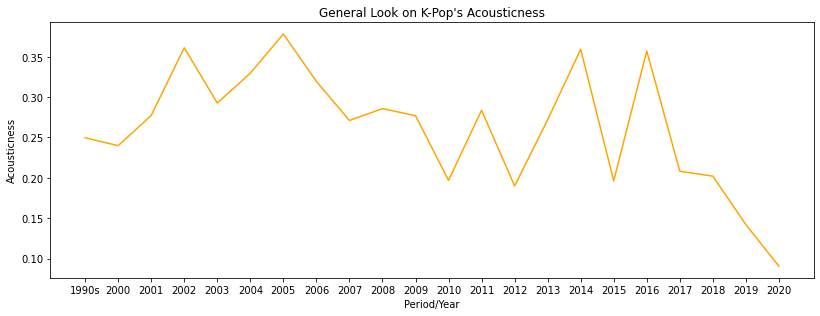

In [ ]:
#Acousticness over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["acousticness"]
plt.plot(x, y, color='orange')
plt.title("General Look on K-Pop's Acousticness")
plt.xlabel("Period/Year")
plt.ylabel("Acousticness")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

Acousticness is inconsistent because groups tend to release ballad songs and pop songs in turn.

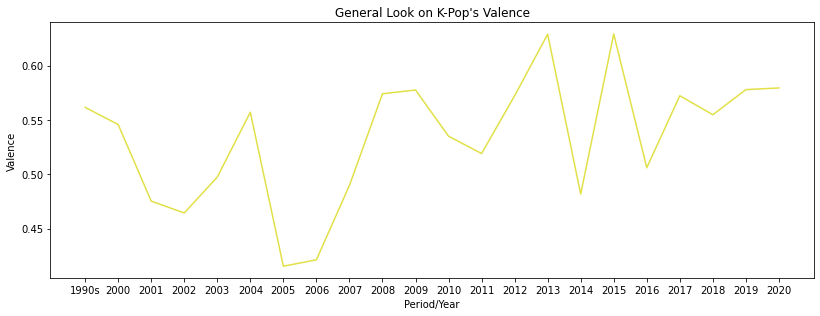

In [ ]:
#Valence over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["valence"]
plt.plot(x, y, color='#e1e047')
plt.title("General Look on K-Pop's Valence")
plt.xlabel("Period/Year")
plt.ylabel("Valence")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

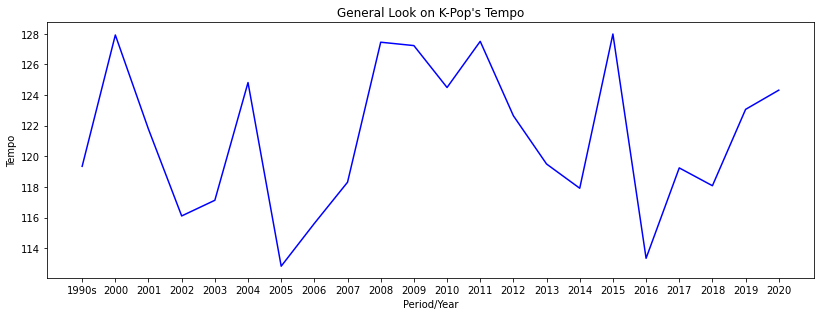

In [ ]:
#Tempo over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["tempo"]
plt.plot(x, y, color='blue')
plt.title("General Look on K-Pop's Tempo")
plt.xlabel("Period/Year")
plt.ylabel("Tempo")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

Tempo is not consistent but with 2nd gen it is getting higher.

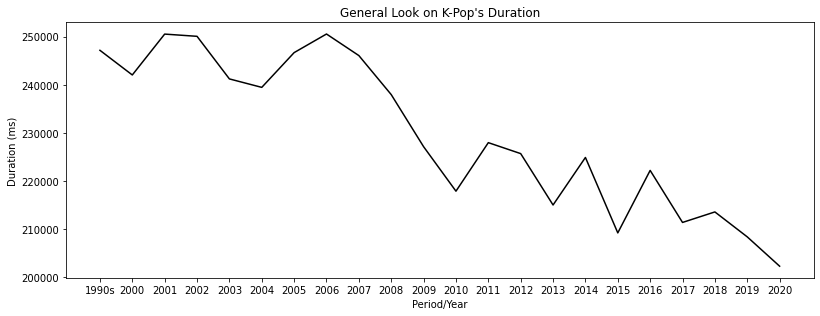

In [ ]:
#Duration over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"]
y = hits_df["duration_ms"]
plt.plot(x, y, color='black')
plt.title("General Look on K-Pop's Duration")
plt.xlabel("Period/Year")
plt.ylabel("Duration (ms)")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()



The duration is decreasing because companies are more focused on releasing mini albums rather than full albums.

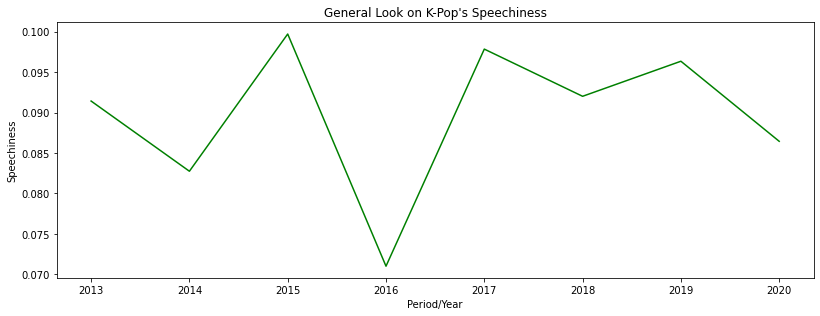

In [ ]:
#Speechiness over the years

fig = plt.figure()
plt.rcParams["figure.figsize"] = [11.5, 4.5]
plt.rcParams["figure.autolayout"] = True
x = hits_df["period"][14:22] 
y = hits_df["speechiness"][14:22]
plt.plot(x, y, color='green')
plt.title("General Look on K-Pop's Speechiness")
plt.xlabel("Period/Year")
plt.ylabel("Speechiness")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.show()

Speechiness is the lowest at 2016, the year that EDM is very popular. Speechiness is increasing because rap and hip-hop is trendy nowadays.

In [ ]:
#Key

for x in range(22): 
    if x == 0:
        period_column = '1990s'
    else:
        period_column = key_list[x]
    key_counts = dfs[key_list[x]]["key"].value_counts()
    df = key_counts.rename_axis('unique_values').reset_index(name='counts')
    df = df.assign(period=[period_column for i in range(df['unique_values'].size)])
    
    if x == 0: 
        key_df = df
    else:
        key_df = key_df.append(df, ignore_index = True)

key_df

unique_values  counts period
0               11       3  1990s
1                6       3  1990s
2                2       3  1990s
3                0       3  1990s
4                7       2  1990s
..             ...     ...    ...
225              4       4   2020
226             11       3   2020
227              0       3   2020
228              8       2   2020
229              3       1   2020

[230 rows x 3 columns]

In [ ]:
#Mode

for x in range(22): 
    if x == 0:
        period_column = '1990s'
    else:
        period_column = key_list[x]
    mode_counts = dfs[key_list[x]]["mode"].value_counts()
    df = mode_counts.rename_axis('unique_values').reset_index(name='counts')
    df = df.assign(period=[period_column for i in range(df['unique_values'].size)])
    
    if x == 0: 
        mode_df = df
    else:
        mode_df = mode_df.append(df, ignore_index = True)

mode_df

unique_values  counts period
0               1      13  1990s
1               0       7  1990s
2               1      17   2000
3               0      13   2000
4               1      18   2001
5               0      12   2001
6               1      20   2002
7               0      10   2002
8               1      18   2003
9               0      11   2003
10              1      16   2004
11              0      13   2004
12              1      18   2005
13              0      11   2005
14              1      19   2006
15              0      11   2006
16              1      17   2007
17              0      11   2007
18              1      17   2008
19              0      12   2008
20              1      19   2009
21              0      10   2009
22              1      16   2010
23              0      13   2010
24              1      16   2011
25              0      13   2011
26              1      17   2012
27              0      13   2012
28              1      20   2013
29              0       9   2013
30              1      19   2014
31              0      11   2014
32              1      19   2015
33              0      11   2015
34              1      23   2016
35              0       7   2016
36              1      27   2017
37              0      23   2017
38              1      41   2018
39              0      36   2018
40              0      28   2019
41              1      22   2019
42              0      27   2020
43              1      23   2020

In [ ]:
#Time Signature

for x in range(22): 
    if x == 0:
        period_column = '1990s'
    else:
        period_column = key_list[x]
    time_signature_counts = dfs[key_list[x]]["time_signature"].value_counts()
    df = time_signature_counts.rename_axis('unique_values').reset_index(name='counts')
    df = df.assign(period=[period_column for i in range(df['unique_values'].size)])
    
    if x == 0: 
        time_signature_df = df
    else:
        time_signature_df = time_signature_df.append(df, ignore_index = True)

time_signature_df



unique_values  counts period
0               4      20  1990s
1               4      29   2000
2               3       1   2000
3               4      30   2001
4               4      29   2002
5               3       1   2002
6               4      29   2003
7               4      26   2004
8               3       3   2004
9               4      28   2005
10              3       1   2005
11              4      29   2006
12              3       1   2006
13              4      27   2007
14              3       1   2007
15              4      29   2008
16              4      26   2009
17              3       2   2009
18              5       1   2009
19              4      29   2010
20              4      29   2011
21              4      30   2012
22              4      29   2013
23              4      28   2014
24              5       1   2014
25              3       1   2014
26              4      28   2015
27              3       2   2015
28              4      30   2016
29              4      49   2017
30              3       1   2017
31              4      76   2018
32              3       1   2018
33              4      49   2019
34              3       1   2019
35              4      50   2020

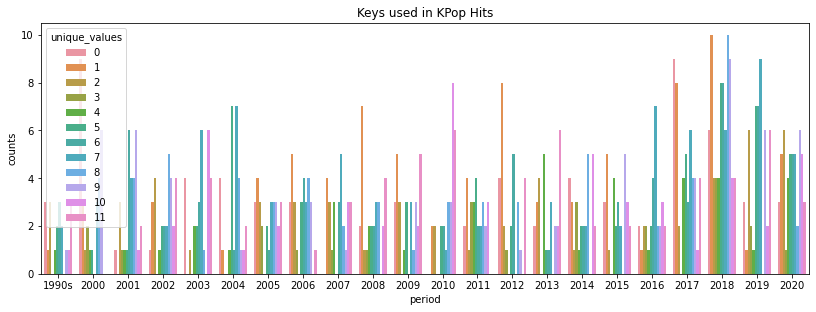

In [ ]:
#Key

sns.barplot(y='counts',x='period',hue='unique_values',data=key_df)
sns.set(rc={'figure.figsize':(50, 10)})
plt.rcParams["figure.autolayout"] = True
plt.title("Keys used in KPop Hits");

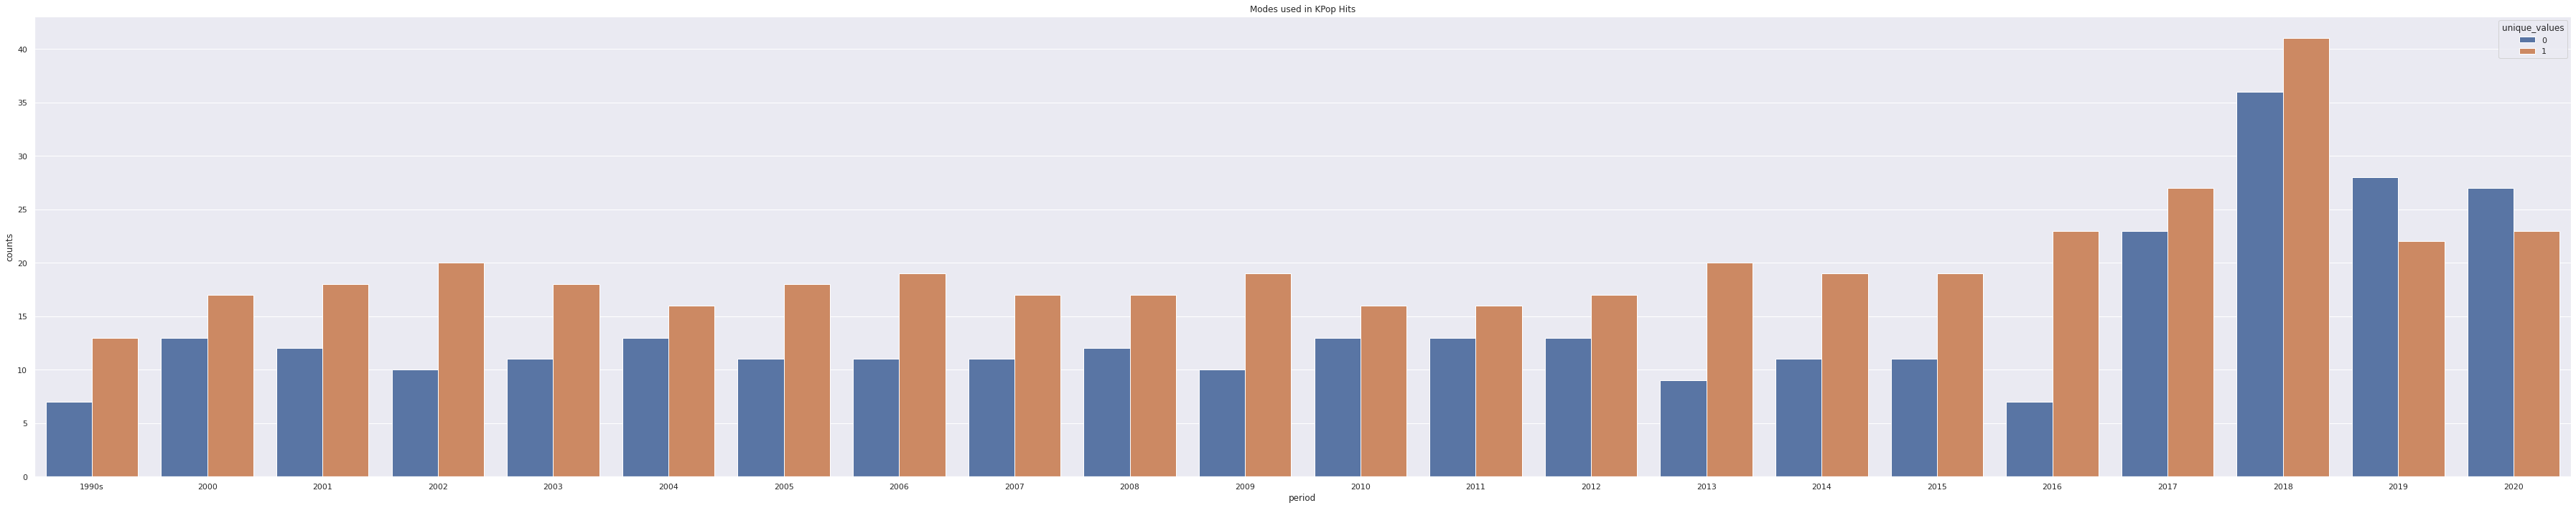

In [ ]:
#Mode

sns.barplot(y='counts',x='period',hue='unique_values',data=mode_df)
sns.set(rc={'figure.figsize':(50,10)})
plt.rcParams["figure.autolayout"] = True
plt.title("Modes used in KPop Hits");

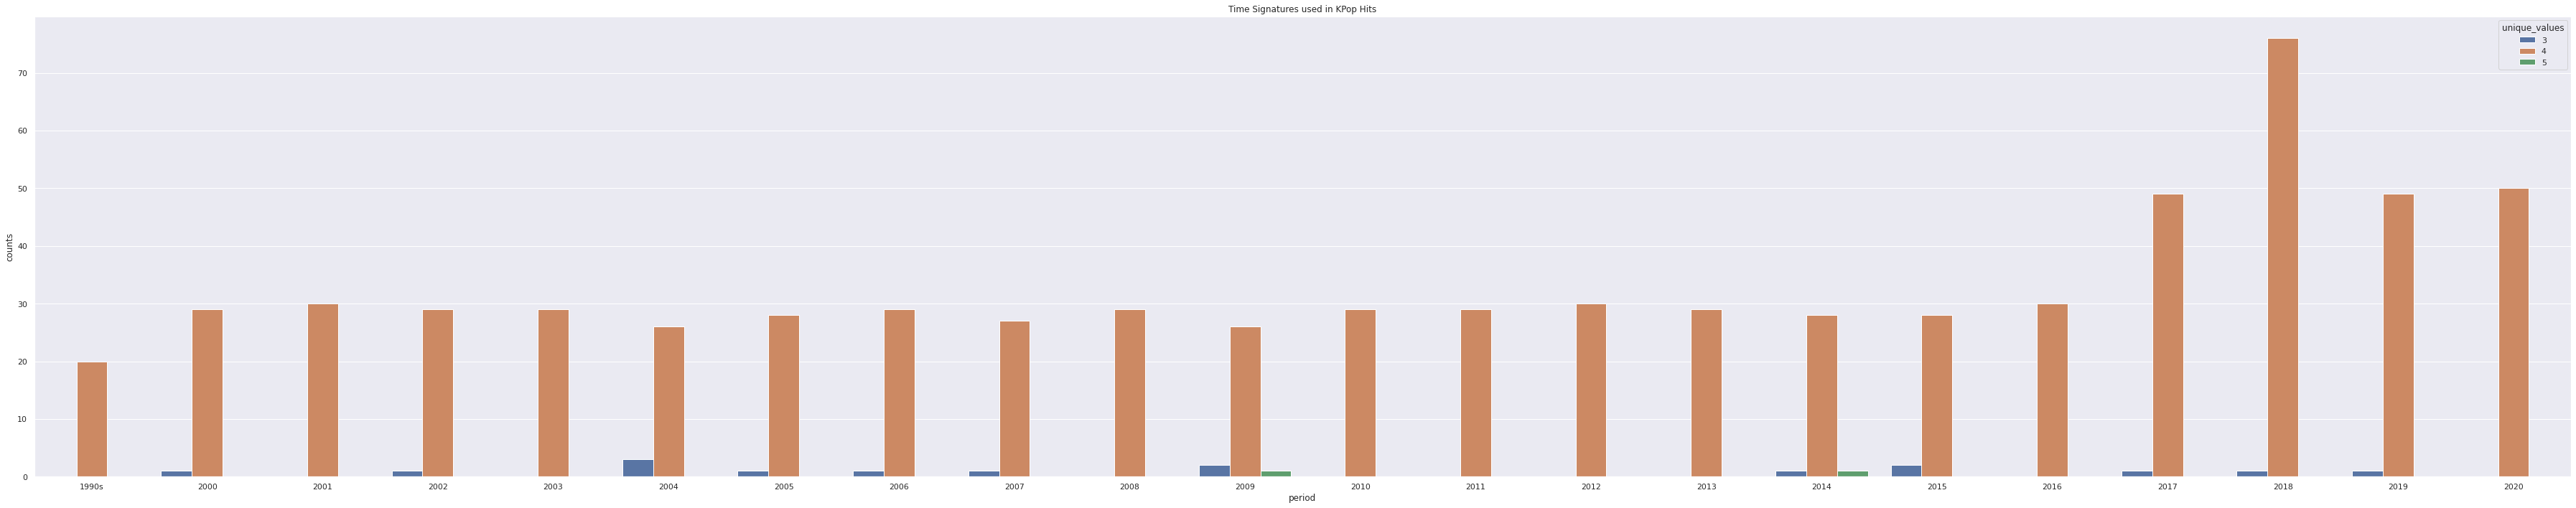

In [ ]:
#Time Signature

sns.barplot(y='counts',x='period',hue='unique_values',data=time_signature_df)
sns.set(rc={'figure.figsize':(50,10)})
plt.rcParams["figure.autolayout"] = True
plt.title("Time Signatures used in KPop Hits");

### *Spotipy and Other Analyzes*

In [ ]:
!pip install spotipy
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

     |████████████████████████████████| 138 kB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
CLIENT_ID = "f170da764e454f3ea13177a5fc610edc"
CLIENT_SECRET = "b3989dba25144c5b819957c72dd1c35a"

In [ ]:
client_credentials_manager = SpotifyClientCredentials(CLIENT_ID, CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DWZKujt4hK7mM"

In [ ]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [ ]:
#getting a dataframe
playlist_df = analyze_playlist(playlist_creator, playlist_id)

In [ ]:
playlist_df

artist  ... time_signature
0                   BTS  ...              4
1             BLACKPINK  ...              4
2                 TWICE  ...              4
3            Stray Kids  ...              4
4            Red Velvet  ...              4
5                   EXO  ...              4
6             SEVENTEEN  ...              4
7               NCT 127  ...              4
8              (G)I-DLE  ...              4
9                  ITZY  ...              4
10              MAMAMOO  ...              4
11                 DAY6  ...              4
12                ATEEZ  ...              4
13  TOMORROW X TOGETHER  ...              4
14             Monsta X  ...              4
15                 GOT7  ...              4
16            NCT DREAM  ...              4
17              BIGBANG  ...              4
18             EVERGLOW  ...              4
19               IZ*ONE  ...              4

[20 rows x 16 columns]

In [ ]:
import json

#song features for Yestoday

features = sp.audio_features("4SrkrzWiFxEzMBOSOE5qGW")
for feature in features:
    print(json.dumps(feature, indent=4))
    print()
    
   #uncomment for getting the analysis for Yestoday 
   # analysis = sp._get(feature['analysis_url'])
   # print(json.dumps(analysis, indent=4))


{
    "danceability": 0.68,
    "energy": 0.888,
    "key": 9,
    "loudness": -4.377,
    "mode": 0,
    "speechiness": 0.136,
    "acousticness": 0.0688,
    "instrumentalness": 0,
    "liveness": 0.118,
    "valence": 0.633,
    "tempo": 95.014,
    "type": "audio_features",
    "id": "4SrkrzWiFxEzMBOSOE5qGW",
    "uri": "spotify:track:4SrkrzWiFxEzMBOSOE5qGW",
    "track_href": "https://api.spotify.com/v1/tracks/4SrkrzWiFxEzMBOSOE5qGW",
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/4SrkrzWiFxEzMBOSOE5qGW",
    "duration_ms": 227885,
    "time_signature": 4
}



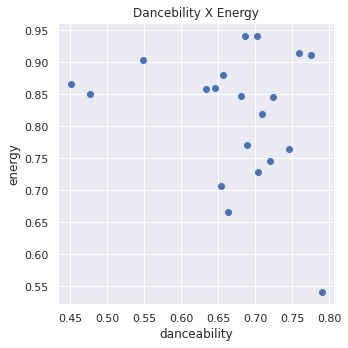

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()
# scatter the sepal_length against the sepal_width
ax.scatter(playlist_df['danceability'], playlist_df['energy'])
# set a title and labels
ax.set_title('Dancebility X Energy')
ax.set_xlabel('danceability')
ax.set_ylabel('energy');
fig.set_size_inches(5,5)

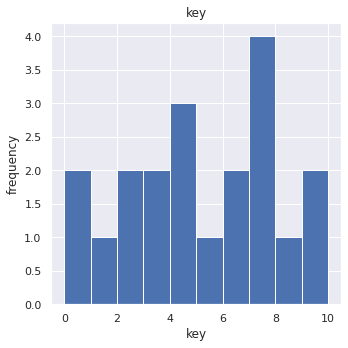

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(playlist_df['key'])
# set title and labels
ax.set_title('key')
ax.set_xlabel('key')
ax.set_ylabel('frequency');
fig.set_size_inches(5,5)


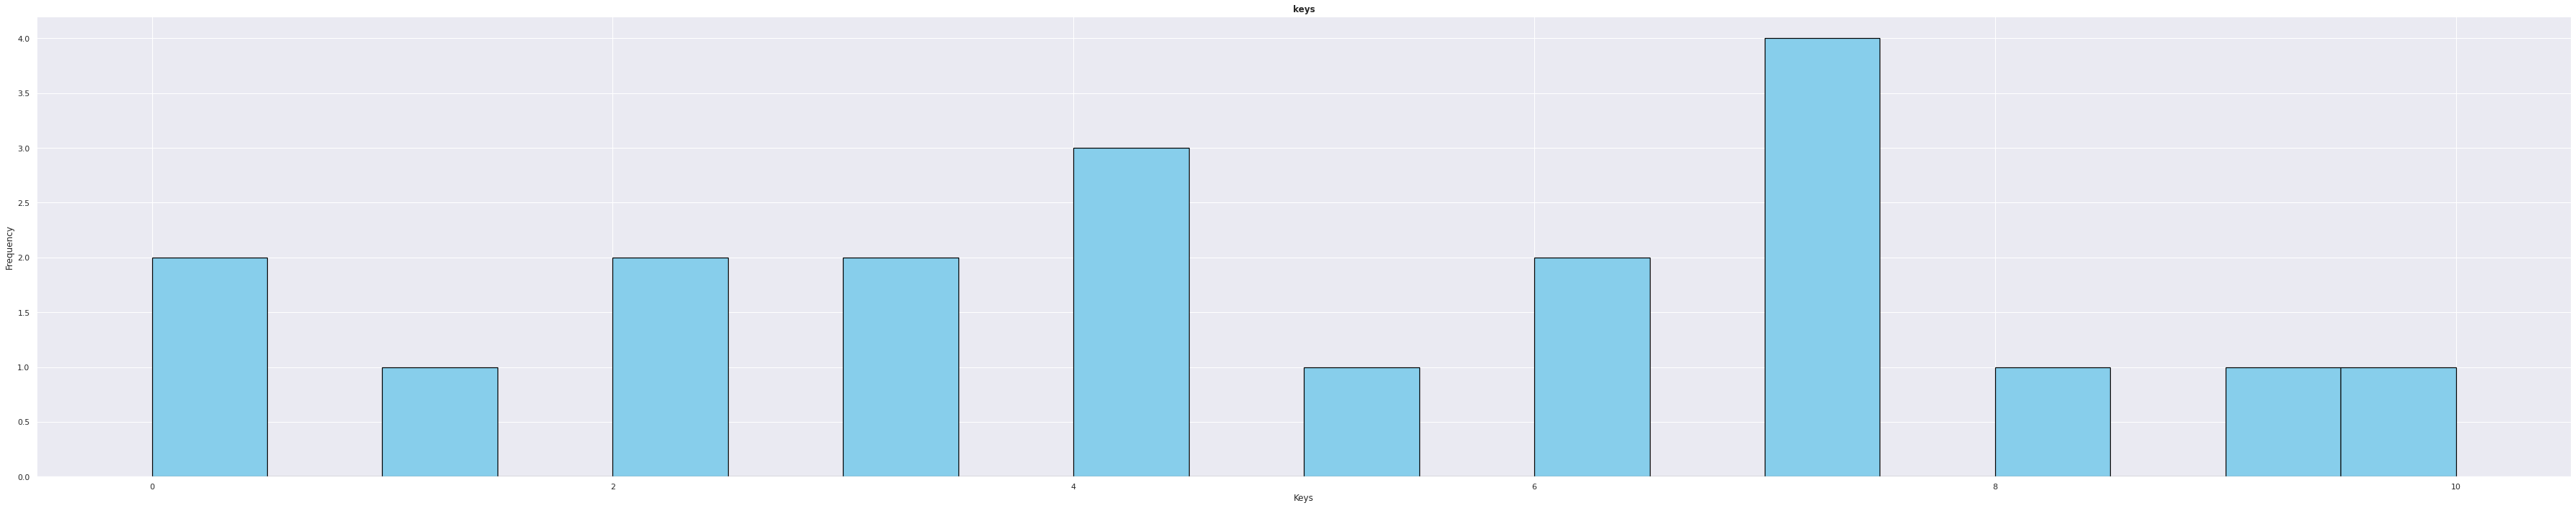

In [ ]:
plt.hist(playlist_df['key'], color = "skyblue", edgecolor='black', linewidth=1.2, bins = 20)
plt.title('keys', fontweight ="bold")
plt.xlabel('Keys')
plt.ylabel('Frequency');
figsize=(5,5)

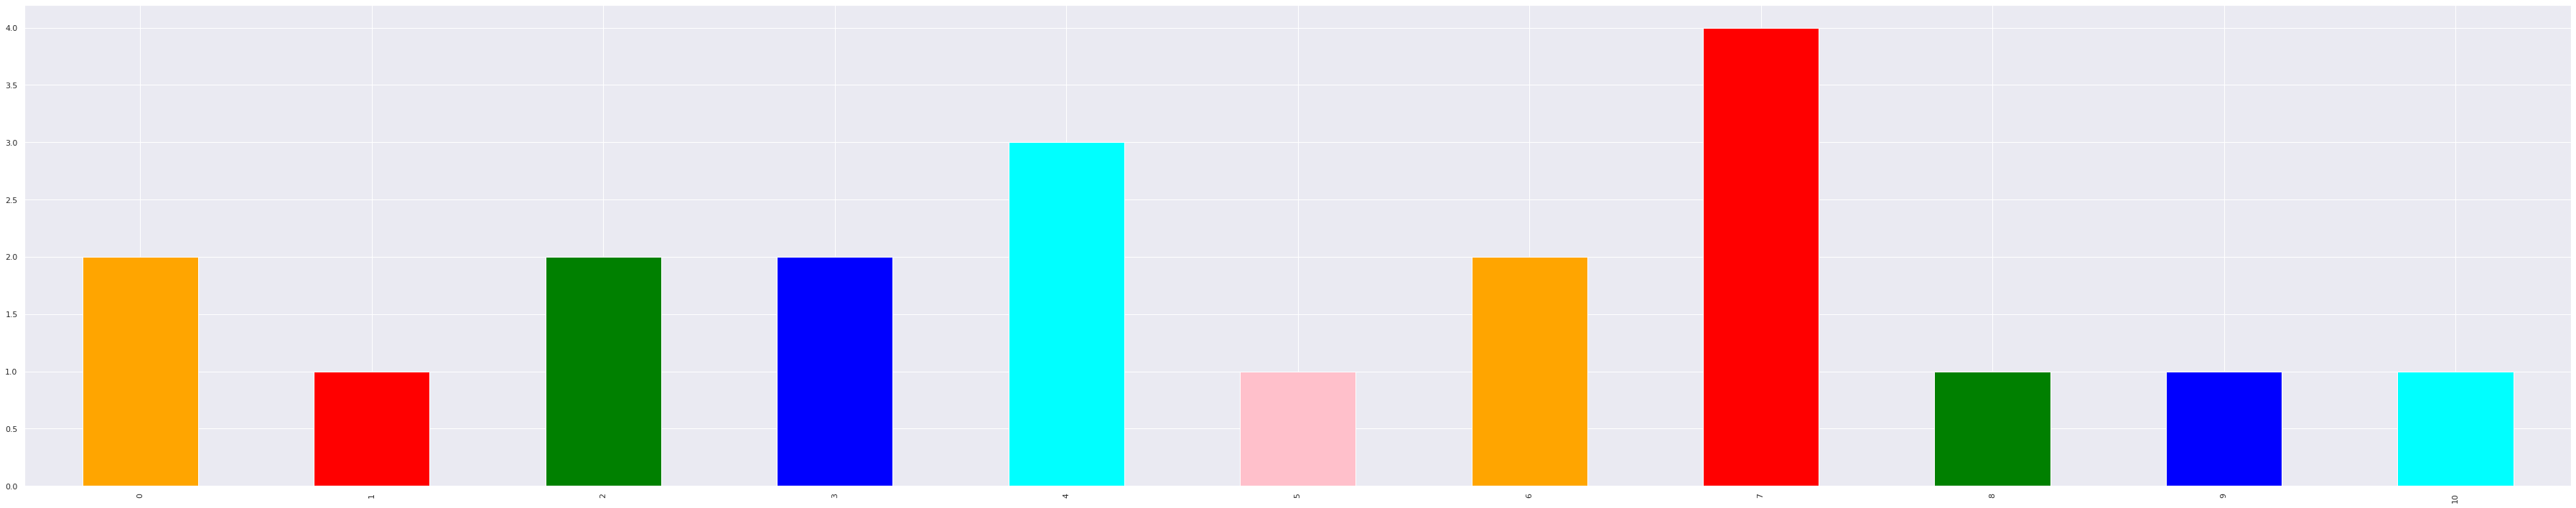

In [ ]:
playlist_df['key'].value_counts().sort_index().plot.bar(color=['orange', 'red', 'green', 'blue', 'cyan', 'pink']);

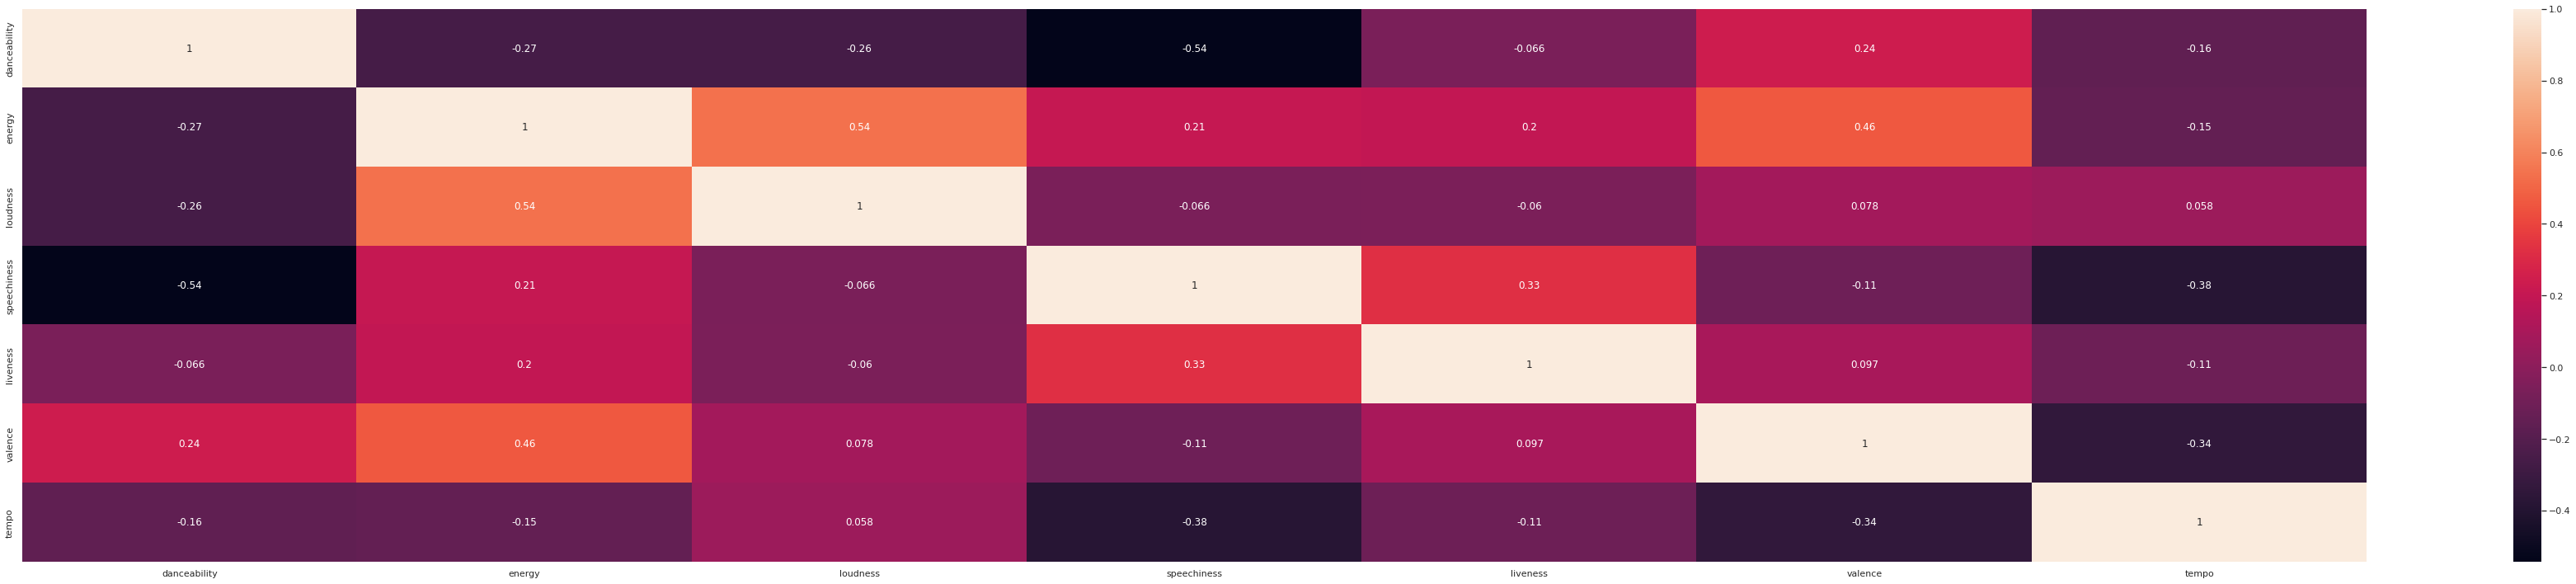

In [ ]:
sns.heatmap(playlist_df.corr(), annot=True);

In [ ]:
#takes long time, if need to run, please uncomment
#sns.pairplot(playlist_df);

# Merging CSV's

In [ ]:
#Preparing idol dataset to merge
df_idolsm=df_idols.drop(df_idols.columns[[1,2,3,4,5,7,11,12,13]],axis=1)
df_idolsm=df_idolsm.rename(columns={"Stage Name":"Artist Name"})
df_idolsm["Artist Name"] = df_idolsm["Artist Name"].str.strip()
df_idolsm["Artist Name"] = df_idolsm["Artist Name"].str.lower()

In [ ]:
#Preparing boy group dataset for merge
df_bg=pd.read_csv('kpop_idols_boy_groups.csv')
df_bg['Gender']= 'M'
df_bg["Name"] = df_bg["Name"].astype(str)
df_bg.Name = df_bg.Name.str.strip()
df_bg=df_bg.drop(df_bg.columns[[1,2,7]],axis=1)

In [ ]:
#Preparing girl group dataset for merge
df_gg=pd.read_csv('kpop_idols_girl_groups.csv')
df_gg['Gender']= 'F'
df_gg["Name"] = df_gg["Name"].astype(str)
df_gg.Name = df_gg.Name.str.strip()

In [ ]:
#Creating groups dataset.
df_groups=pd.concat([df_bg,df_gg],ignore_index=True)
#For merge, we need Age of group. So we calculate mean age from idols dataset and merge the information in group dataset.
agemean=df_idols.groupby(['Group'])
agemean=agemean['Age'].mean()
df_groups=df_groups.rename(columns={"Name":"Group"})
df_groups=pd.merge(df_groups, agemean,on='Group')
#For merge, column names have to be same.
df_groups=df_groups.rename(columns={"Group":"Artist Name"})
# Also for accurate merging, everything will be lowercase and stripped (for escape e.g)
df_groups["Artist Name"] = df_groups["Artist Name"].str.strip()
df_groups["Artist Name"] = df_groups["Artist Name"].str.lower()
# Calculating experience for each group using their debut date
df_groups['Debut']=pd.DatetimeIndex(df_groups['Debut'])
df_groups['Experience'] = df_groups['Debut'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
df_groups

Artist Name      Debut    Company  ...  Fanclub Name        Age Experience
0            100% 2012-09-18  TOP Media  ...           NaN  30.200000          9
1             14u 2017-04-17         BG  ...           NaN  24.214286          4
2           1the9 2019-02-09        MBK  ...           NaN  20.000000          2
3             24k 2012-09-06     Choeun  ...           NaN  27.000000          9
4             2pm 2008-07-04        JYP  ...           NaN  32.500000         13
..            ...        ...        ...  ...           ...        ...        ...
140         twice 2015-10-20        JYP  ...          Once  24.000000          6
141         two x 2012-08-20    J. Tune  ...           NaN  30.500000          9
142        wassup 2013-08-07      Mafia  ...           NaN  26.250000          8
143     weki meki 2017-08-08   Fantagio  ...           NaN  21.625000          4
144  wonder girls 2007-02-13        JYP  ...     Wonderful  30.750000         14

[145 rows x 12 columns]

In [ ]:
#Open the dataset that we webscraped and preparing it for merging.
df_youtube2=pd.read_csv('youtubescraped3.csv')
df_youtube2=df_youtube2.rename(columns={"Artist":"Artist Name"})
df_youtube2=df_youtube2.rename(columns={"Track Name":"Song Name"})
df_youtube2["Artist Name"] = df_youtube2["Artist Name"].str.strip()
df_youtube2["Artist Name"] = df_youtube2["Artist Name"].str.lower()
df_youtube2

Song Name       Type  ...                         Video         Views
0              #A-Ya        Boy  ...  https://youtu.be/jCmaXx_hp3g  1.027610e+05
1        #Cookie Jar       Girl  ...  https://youtu.be/rRgTMs_bGuI  3.841032e+07
2           #Curious      Co-ed  ...  https://youtu.be/OslCGxAfNb0  3.289500e+05
3            #LoveMe       Girl  ...  https://youtu.be/UMOVGU-IyHY  9.892760e+05
4               #WYD        Boy  ...  https://youtu.be/hth1VQNPtj0  2.756141e+07
...              ...        ...  ...                           ...           ...
3752  yaya (Me Time)  Girl Solo  ...  https://youtu.be/BJD0arHF_5c  1.129198e+06
3753          yayaya       Girl  ...  https://youtu.be/sLfRdyqxXJk  1.446101e+06
3754   Gangnam Style   Boy Solo  ...                           NaN  4.318353e+09
3755       Gentleman   Boy Solo  ...                           NaN  1.462790e+09
3756           DADDY   Boy Solo  ...                           NaN  6.161742e+08

[3757 rows x 6 columns]

In [ ]:
df_ygroups2=pd.merge(df_groups, df_youtube2, on='Artist Name') #group info and youtube info merged
df_ygroups2['IsGroup']=1
df_ysolos2=pd.merge(df_youtube2, df_idolsm, on='Artist Name').drop_duplicates() #solo info and youtube info merged
df_ysolos2['IsGroup']=0
df_merged2=pd.concat([df_ygroups2,df_ysolos2],ignore_index=True)
df_merged2["Song Name"] = df_merged2["Song Name"].str.strip()
df_merged2["Song Name"] = df_merged2["Song Name"].str.lower()

In [ ]:
def company(row):    
    if (row['Company']=='SM') or (row['Company']=='JYP')or(row['Company']=='Big Hit')or(row['Company']=='YG'):
        return 2
    elif (row['Company']=='Starship') or (row['Company']=='Cube')or(row['Company']=='FNC')or(row['Company']=='Pledis')or(row['Company']=='Fantagio')or(row['Company']=='Kakao') or(row['Company']=='PSY'):
        return 1
    else:
      return 0
df_merged2['Company_Popularity'] = df_merged2.apply(lambda row: company(row), axis=1)

In [ ]:
def collab(row):    
    if row['Type'] == "Co-ed":
        return 1
    else:
      return 0
df_merged2['Collab'] = df_merged2.apply(lambda row: collab(row), axis=1)


In [ ]:
def ost(row):    
    if row['Release'] == "OST":
        return 1
    else:
      return 0
df_merged2['OST'] = df_merged2.apply(lambda row: ost(row), axis=1)


In [ ]:
def jpn(row):    
    if row['Release'] == "Japanese":
        return 1
    else:
      return 0
df_merged2['Japanese'] = df_merged2.apply(lambda row: jpn(row), axis=1)

In [ ]:
def eng(row):    
    if row['Release'] == "English":
        return 1
    else:
      return 0
df_merged2['English'] = df_merged2.apply(lambda row: eng(row), axis=1)

In [ ]:
def chn(row):    
    if row['Release'] == "Chinese":
        return 1
    else:
      return 0
df_merged2['Chinese'] = df_merged2.apply(lambda row: chn(row), axis=1)

In [ ]:
def special(row):    
    if row['Release'] == "Special":
        return 1
    else:
      return 0
df_merged2['Special'] = df_merged2.apply(lambda row: special(row), axis=1)

In [ ]:
def major(row):    
    if row['Release'] == "Major":
        return 1
    else:
      return 0
df_merged2['Major'] = df_merged2.apply(lambda row: major(row), axis=1)

In [ ]:
#Open the dataset about Spotify we found online and prepare for merging
df_hits=pd.read_csv("albums_and_tracks.csv")
df_hits=df_hits.drop(df_hits.columns[[0,2,3,4,6,7]],axis=1)
df_hits=df_hits.rename(columns={"Artist":"Artist Name"})
df_hits=df_hits.rename(columns={"Track_Title":"Song Name"})
df_hits["Artist Name"] = df_hits["Artist Name"].str.strip()
df_hits["Artist Name"] = df_hits["Artist Name"].str.lower()
df_hits["Song Name"] = df_hits["Song Name"].str.strip()
df_hits["Song Name"] = df_hits["Song Name"].str.lower()

In [ ]:
#Open the dataset we found online and arranged and prepare for merging
df_spotify=pd.read_csv("kpopspotify.csv")
df_spotify["Artist Name"] = df_spotify["Artist Name"].str.strip()
df_spotify["Artist Name"] = df_spotify["Artist Name"].str.lower()
df_spotify["Song Name"] = df_spotify["Song Name"].str.strip()
df_spotify["Song Name"] = df_spotify["Song Name"].str.lower()

In [ ]:
#Putting together spotify infos with Youtube info and Idol/Group info.
df_merged3=pd.merge(df_merged2, df_spotify, on=['Song Name','Artist Name'])

In [ ]:
#Putting together spotify infos with Youtube info and Idol/Group info.
df_merged4=pd.merge(df_merged2, df_hits, on=['Song Name','Artist Name'])
df_merged4=df_merged4.drop_duplicates(subset=['Song Name', 'Artist Name'],ignore_index=True)
df_merged4=df_merged4[df_merged4['Artist Name'].notna()]
df_merged4=df_merged4.reset_index()

In [ ]:
#Since we got two different Spotify dataframes, we concate them.
df_merged5=pd.concat([df_merged3,df_merged4],ignore_index=True)
df_merged5=df_merged5.drop_duplicates(subset=['Song Name', 'Artist Name'],ignore_index=True)
df_merged5['Members'] = df_merged5['Members'].fillna(1)
df_merged5['Orig. Memb.'] = df_merged5['Members'].fillna(1)
df_merged5=df_merged5[df_merged5['Views'].notna()]

In [ ]:
#Cleaning the dataset by dropping some columns.
df_merged5=df_merged5.drop(df_merged5.columns[[1,2,4,5,7,8,9,12,13,14,15,26,29,30,32,33,35,37,38,39]],axis=1)
df_merged5

Artist Name  Members Gender  ...  speechiness    tempo  time_signature
0           2pm      6.0      M  ...       0.0398  124.975             4.0
1           2pm      6.0      M  ...       0.0508  130.003             4.0
2         ab6ix      5.0      M  ...       0.2060  124.954             4.0
3         astro      6.0      M  ...       0.1860  150.062             4.0
4         ateez      8.0      M  ...       0.0499   97.968             4.0
..          ...      ...    ...  ...          ...      ...             ...
472      taemin      1.0      M  ...       0.0894   85.039             4.0
473      taemin      1.0      M  ...       0.0689  104.943             4.0
474     taeyang      1.0      M  ...       0.0318  141.939             4.0
475         psy      1.0      M  ...       0.1300  132.050             4.0
476       ailee      1.0      F  ...       0.1360  140.030             4.0

[470 rows x 20 columns]

In [ ]:
df_merged2.to_csv('fordecisiontree.csv',encoding='utf-8-sig')

# ***REGRESSION***

##Get Dummies, Drop Columns, Visualize Linearity
---





### *Preparing Youtube and Spotify Dataset*

In [ ]:
df_reg=df_merged5.drop(df_merged5.columns[[0,6]],axis=1)


In [ ]:
#For regression, everything should be number. So we create dummies for Gender columns.
df_reg = pd.get_dummies(df_reg, columns=['Gender'])
df_reg

Members        Age  Experience  ...  time_signature  Gender_F  Gender_M
0        6.0  32.500000        13.0  ...             4.0         0         1
1        6.0  32.500000        13.0  ...             4.0         0         1
2        5.0  23.000000         2.0  ...             4.0         0         1
3        6.0  23.833333         5.0  ...             4.0         0         1
4        8.0  22.125000         3.0  ...             4.0         0         1
..       ...        ...         ...  ...             ...       ...       ...
472      1.0  28.000000         7.0  ...             4.0         0         1
473      1.0  28.000000         7.0  ...             4.0         0         1
474      1.0  33.000000        13.0  ...             4.0         0         1
475      1.0  44.000000        20.0  ...             4.0         0         1
476      1.0  32.000000         9.0  ...             4.0         1         0

[470 rows x 19 columns]

### *Preparing Only Youtube Dataset*

In [ ]:
#Dropping spotify infos for another regression.
df_onlyyt=df_merged2.copy()
df_onlyyt=df_onlyyt.drop(df_onlyyt.columns[[0,1,2,4,5,7,8,9,11,12,13,14,15]],axis=1)
df_onlyyt=pd.get_dummies(df_onlyyt, columns=['Gender'])
df_onlyyt['Members'] = df_onlyyt['Members'].fillna(1)
df_onlyyt=df_onlyyt[df_onlyyt['Views'].notna()]
df_onlyyt

Members   Age        Views  IsGroup  ...  Special  Major  Gender_F  Gender_M
0         4.0  30.2      97552.0        1  ...        0      0         0         1
1         4.0  30.2    3641233.0        1  ...        0      1         0         1
2         4.0  30.2    1977480.0        1  ...        0      1         0         1
3         4.0  30.2     770979.0        1  ...        0      1         0         1
4         4.0  30.2      61630.0        1  ...        0      1         0         1
...       ...   ...          ...      ...  ...      ...    ...       ...       ...
1902      1.0  29.0   47541762.0        0  ...        0      1         0         1
1903      1.0  33.0  129931027.0        0  ...        0      1         0         1
1904      1.0  29.0    1859019.0        0  ...        0      1         0         1
1905      1.0  29.0     495165.0        0  ...        0      1         0         1
1906      1.0  31.0     406534.0        0  ...        0      0         1         0

[1853 rows x 14 columns]

### *Is Linear? Visualization*

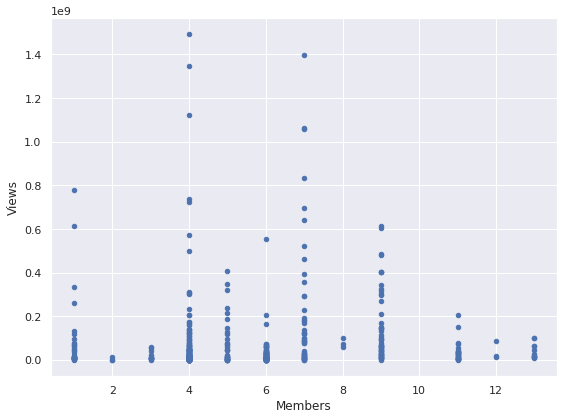

In [ ]:
df_reg.plot(kind='scatter',x='Members',y='Views',figsize=(8, 6));

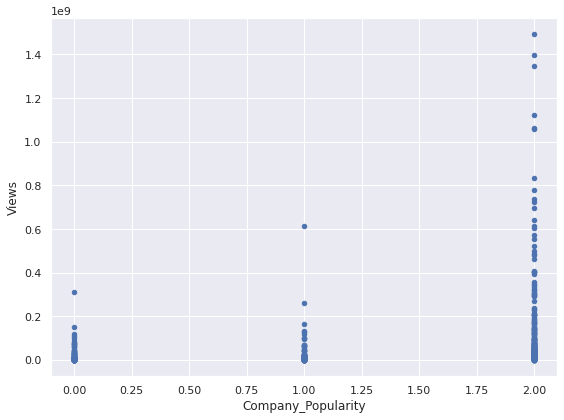

In [ ]:
df_reg.plot(kind='scatter',x='Company_Popularity',y='Views',figsize=(8, 6));

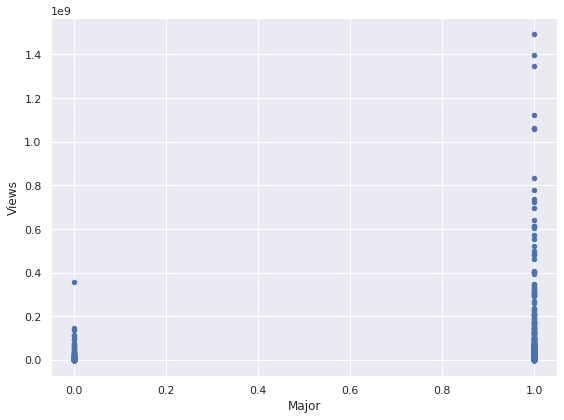

In [ ]:
df_reg.plot(kind='scatter',x='Major',y='Views',figsize=(8, 6));

Our dataset is not looking suitable for Linear Regression. The values are not continous. They are more likely in the binary form.

## Linear Regression

###*Youtube with Spotify Linear Regression*

In [ ]:
#We will predict Views, so it is going to be Y. 
#We split our dataset into train and test and randomize it.
from sklearn.model_selection import train_test_split
y=df_reg['Views']
x = df_reg.drop('Views',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
#We need to scale our numeric metrics for better regression.
from sklearn import *
from sklearn.preprocessing import StandardScaler
numeric=['Members', 'Age','Experience','energy','tempo','speechiness','key']
sc=StandardScaler()
x_train[numeric]=sc.fit_transform(x_train[numeric])
x_test[numeric]=sc.transform(x_test[numeric])

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train.values,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ 7.72871135e+07,  1.75978864e+08,  1.63123965e+08,  1.36766424e+08,
        9.97563968e+07,  1.22193948e+08, -3.37124733e+07,  1.15089101e+08,
       -7.29574669e+07,  1.41630960e+08,  1.63397068e+08,  1.20188827e+08,
        1.64274558e+08,  2.08741843e+08,  1.04485759e+08, -3.76533720e+07,
        1.01959573e+08,  1.87014018e+08,  1.36402221e+08,  1.73875441e+08,
        1.03947551e+08,  7.88037704e+07,  8.10062440e+07,  1.53755851e+08,
        6.38236399e+07, -2.45184703e+07,  1.49605933e+08,  1.35422076e+08,
        1.26105505e+08, -3.68872004e+07,  2.15147233e+08,  1.01669866e+08,
        8.98918188e+07,  2.36222748e+07,  6.09953577e+07,  1.48284529e+08,
        1.47187920e+08,  1.33029569e+08,  1.38748295e+07,  1.51078031e+08,
        7.48683378e+07,  1.75613217e+08,  1.25830125e+08,  1.00783891e+08,
        1.11977978e+08,  4.07758608e+07,  4.19571757e+07,  1.86590498e+08,
        1.78565136e+08,  2.35061811e+08,  1.84796143e+07, -1.54296338e+07,
        1.40539032e+08,  

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_prediction, 'Diff': abs(y_test-y_prediction)})
mlr_diff.sort_values(by='Diff')

Actual value  Predicted value          Diff
447  1.467805e+08     1.496059e+08  2.825438e+06
303  1.858859e+07     1.387483e+07  4.713761e+06
404  4.305091e+06     9.070361e+06  4.765270e+06
64   7.210254e+07     7.975840e+07  7.655861e+06
323  6.369926e+06    -1.437303e+06  7.807229e+06
..            ...              ...           ...
18   3.579487e+08     6.099536e+07  2.969533e+08
198  4.622211e+08     1.405390e+08  3.216820e+08
126  6.154972e+08     2.350618e+08  3.804353e+08
80   1.124010e+09     2.182231e+08  9.057867e+08
19   1.398871e+09     1.575734e+08  1.241297e+09

[94 rows x 3 columns]

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_prediction)
print("r2 score is",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.11685550487510155
mean_sqrd_error is== 3.5556019556297196e+16
root_mean_squared error of is== 188563038.68016446


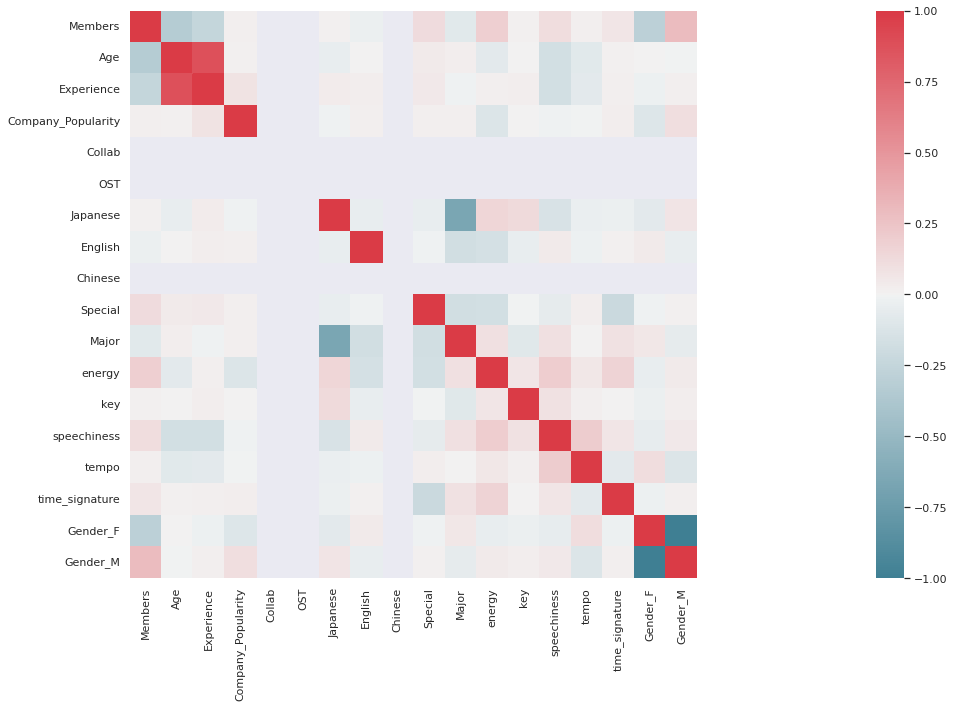

In [ ]:
import seaborn as sns
corr = x_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True);

In [ ]:
LR.score(x_train.values, y_train)

0.18195309206056265

In [ ]:
LR.score(x_test.values, y_test)

0.11685550487510155

Linear Regression works poorly, as we expected.

###*Only Youtube Linear Regression*

In [ ]:
from sklearn.model_selection import train_test_split
y1=df_onlyyt['Views']
x1 = df_onlyyt.drop('Views',axis=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [ ]:
numeric=['Members', 'Age']
sc1=StandardScaler()
x1_train[numeric]=sc1.fit_transform(x1_train[numeric])
x1_test[numeric]=sc1.transform(x1_test[numeric])

In [ ]:
LR1 = LinearRegression()
LR1.fit(x1_train.values,y1_train)

LinearRegression()

In [ ]:
LR1.score(x1_train.values, y1_train)

0.08559304256830691

More poor performance since it doesn't get the continious values from Spotify dataset.

## Gradient Boosting Regressor

###*Youtube with Spotify Gradient Boosting Regressor*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=150, 
    max_depth=3, 
    learning_rate=0.1, 
    min_samples_split=3)

gbr.fit(x_train.values, y_train)

GradientBoostingRegressor(min_samples_split=3, n_estimators=150)

In [ ]:
ypred = gbr.predict(x_test.values)
mse = mean_squared_error(y_test,ypred)
 
print("MSE: %.2f" % mse)

MSE: 17241336326434952.00


In [ ]:
gbr.score(x_train.values, y_train)

0.9134389256314636

In [ ]:
gbr.score(x_test.values, y_test)

0.5717577092346029

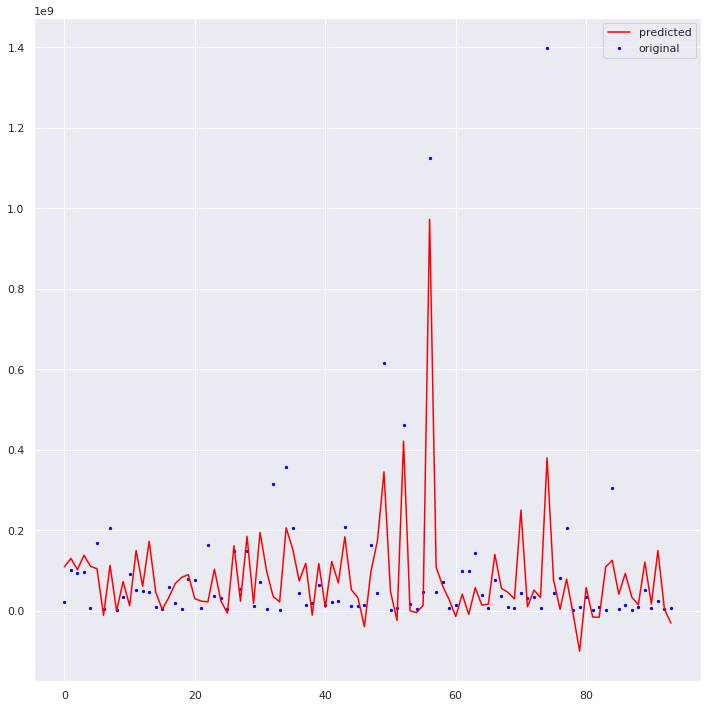

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10, 10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
gbr.predict([[7,24,3,2,0,1,0,0,0,0,1,0.95,3,0.04,124,4,1,0]])

array([2.67469684e+08])

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': ypred, 'Diff': abs(y_test-ypred)})
mlr_diff.sort_values(by='Diff')

Actual value  Predicted value          Diff
404  4.305091e+06     3.403019e+06  9.020721e+05
355  1.035420e+05    -1.236711e+06  1.340253e+06
424  4.047268e+06     2.592406e+06  1.454862e+06
286  1.291238e+07     8.104149e+06  4.808227e+06
42   7.811413e+06     1.424197e+07  6.430561e+06
..            ...              ...           ...
25   3.034569e+08     1.246395e+08  1.788174e+08
454  4.262456e+07     2.496970e+08  2.070724e+08
126  6.154972e+08     3.446068e+08  2.708903e+08
103  3.138900e+08     3.510041e+07  2.787896e+08
19   1.398871e+09     3.793198e+08  1.019551e+09

[94 rows x 3 columns]

###*Only Youtube Gradient Boosting Regressor*

In [ ]:
gbr1 = GradientBoostingRegressor(n_estimators=150, 
    max_depth=3, 
    learning_rate=0.1, 
    min_samples_split=3)

gbr1.fit(x1_train.values, y1_train)

GradientBoostingRegressor(min_samples_split=3, n_estimators=150)

In [ ]:
ypred1 = gbr1.predict(x1_test.values)
mse = mean_squared_error(y1_test,ypred1)
 
print("MSE: %.2f" % mse)

MSE: 5371572866615210.00


In [ ]:
gbr1.score(x1_train.values, y1_train)

0.5593573694008345

In [ ]:
gbr1.score(x1_test.values, y1_test)

0.5664224355162059

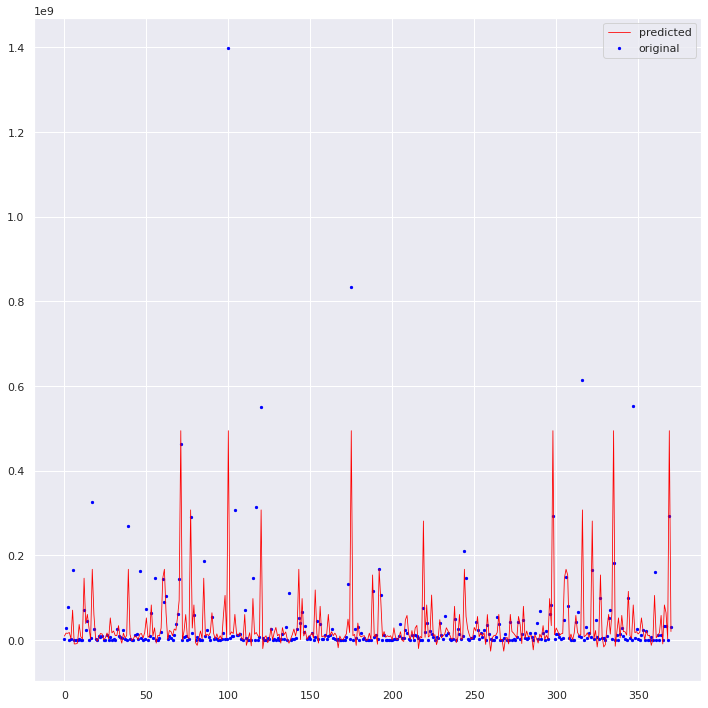

In [ ]:
x_ax = range(len(y1_test))
plt.figure(figsize=(10, 10))
plt.scatter(x_ax, y1_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred1,lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## Logistic Regression

###*Youtube with Spotify Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train.values, y_train.values)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test.values)
logreg.score(x_train.values, y_train.values)

0.898936170212766

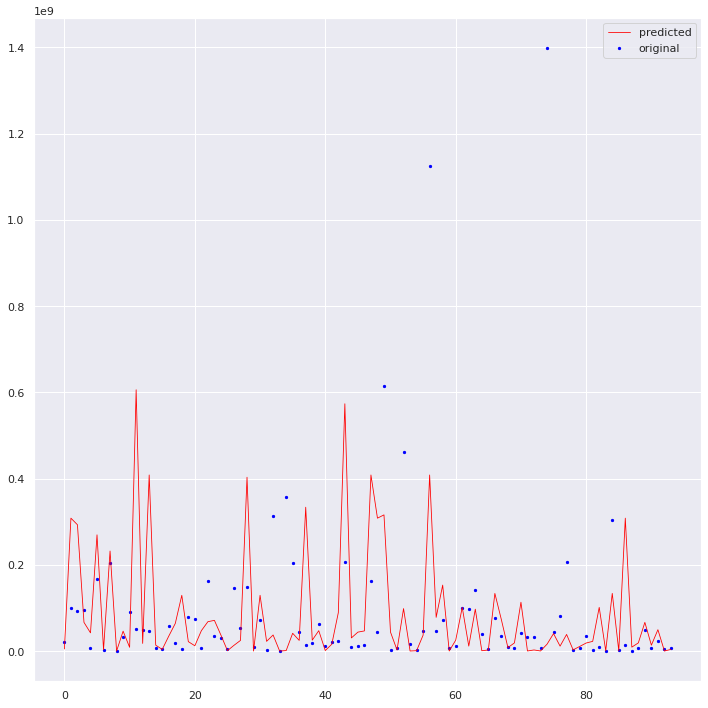

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10, 10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Diff': abs(y_test-y_pred)})
mlr_diff.sort_values(by='Diff')

Actual value  Predicted value          Diff
424  4.047268e+06        4082622.0  3.535400e+04
212  3.196134e+06        3374142.0  1.780080e+05
355  1.035420e+05         306906.0  2.033640e+05
412  6.260850e+05         403733.0  2.223520e+05
222  8.572788e+06        8314273.0  2.585150e+05
..            ...              ...           ...
198  4.622211e+08       98740163.0  3.634809e+08
175  2.076508e+08      573676677.0  3.660259e+08
449  5.214335e+07      606158517.0  5.540152e+08
80   1.124010e+09      408580660.0  7.154292e+08
19   1.398871e+09       16166276.0  1.382704e+09

[94 rows x 3 columns]

In [ ]:
logreg.predict([[6,32,13,2,0,0,0,0,0,0,1,0.82,3,0.04,124,4,0,1]])

array([16629195.])

In [ ]:
logreg.predict([[6,20,2,2,0,0,0,1,0,0,0,1,0.702,4,20,4,0,1]])

array([5181276.])

###*Only Youtube Logistic Regression*

In [ ]:
logreg1 = LogisticRegression()
logreg1.fit(x1_train.values, y1_train.values)

LogisticRegression()

In [ ]:
y_pred1 = logreg1.predict(x1_test.values)
logreg1.score(x1_train.values, y1_train.values)

0.07557354925775979

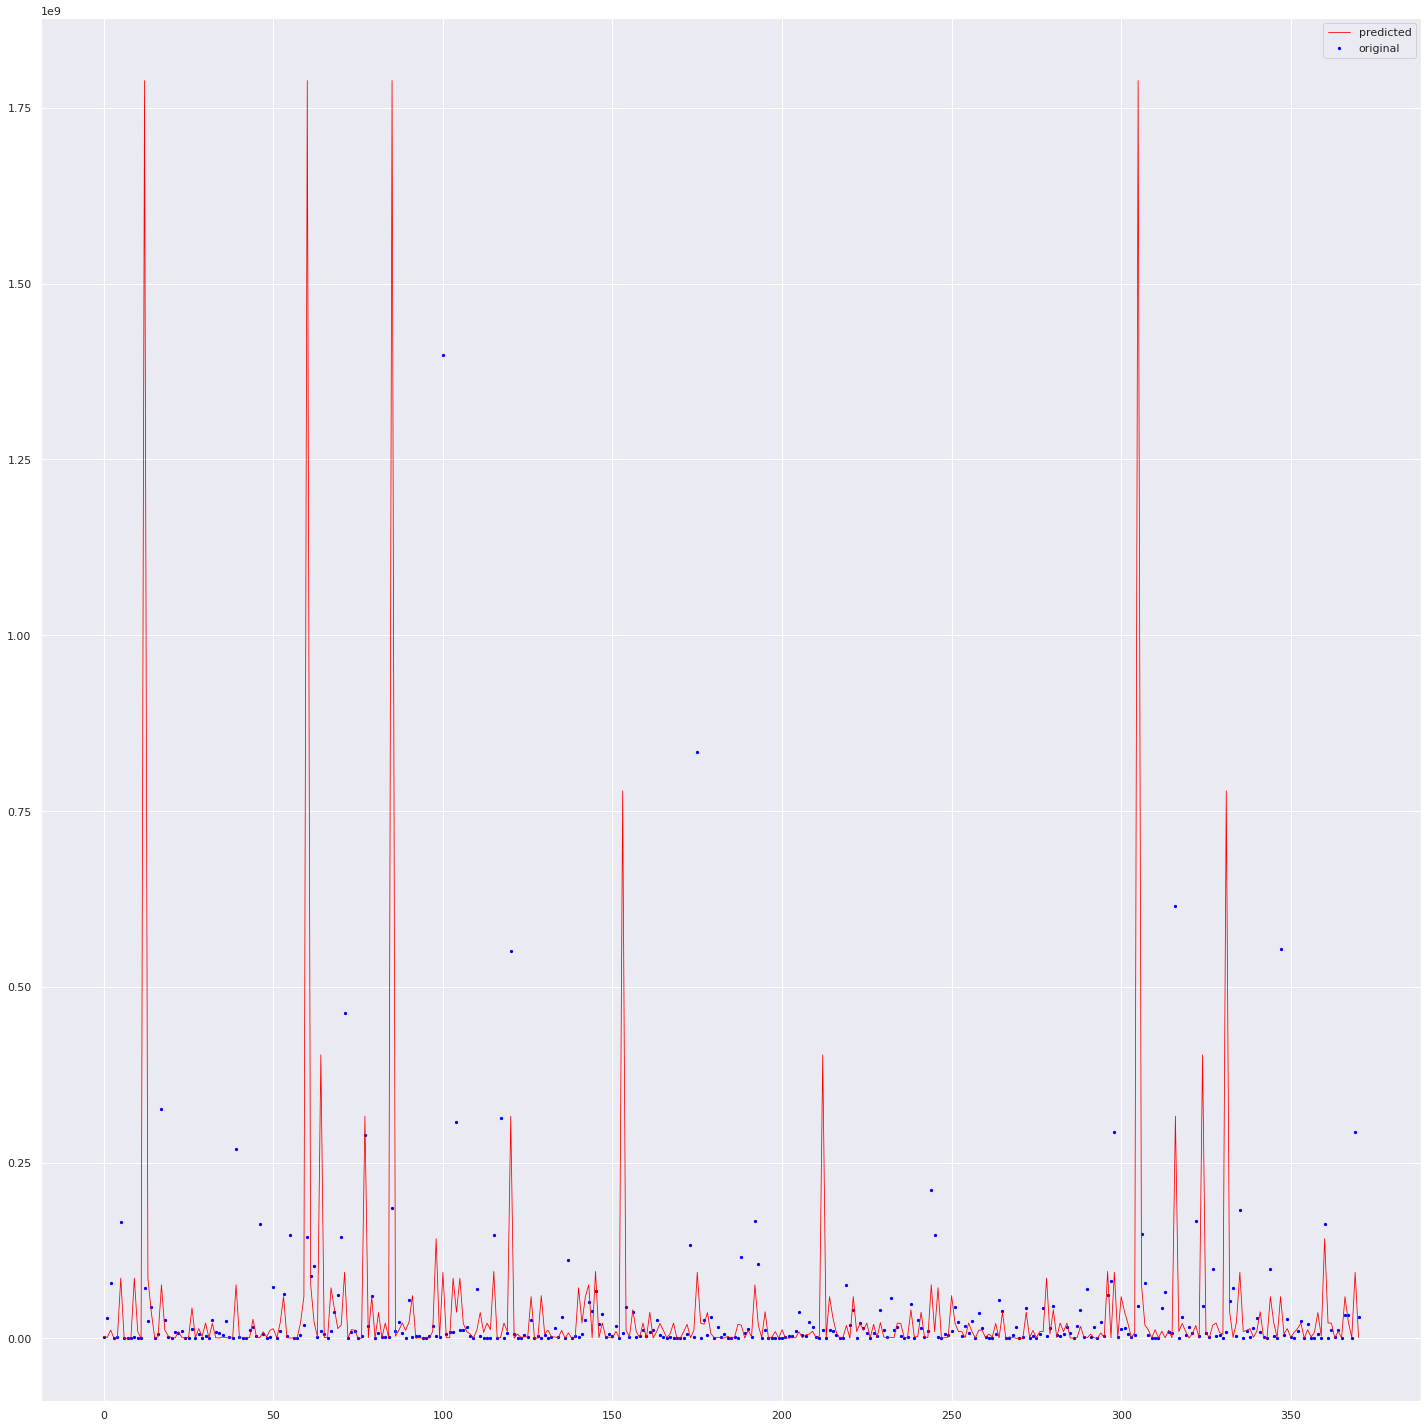

In [ ]:
x1_ax = range(len(y1_test))
plt.figure(figsize=(20, 20))
plt.scatter(x1_ax, y1_test, s=5, color="blue", label="original")
plt.plot(x1_ax, y_pred1, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
mlr_diff1 = pd.DataFrame({'Actual value': y1_test, 'Predicted value': y_pred1, 'Diff': abs(y1_test-y_pred1)})
mlr_diff1.sort_values(by='Diff')

Actual value  Predicted value          Diff
174   9.441600e+04     9.755200e+04  3.136000e+03
223   2.390220e+05     2.471990e+05  8.177000e+03
1632  9.476470e+05     9.359240e+05  1.172300e+04
946   2.133525e+07     2.132231e+07  1.294000e+04
1905  4.951650e+05     4.731270e+05  2.203800e+04
...            ...              ...           ...
268   1.398871e+09     9.400609e+07  1.304865e+09
1534  1.860137e+08     1.788769e+09  1.602755e+09
1523  1.446180e+08     1.788769e+09  1.644151e+09
1536  7.184842e+07     1.788769e+09  1.716921e+09
1539  4.642344e+07     1.788769e+09  1.742346e+09

[371 rows x 3 columns]

# ***RANDOM FOREST***

In [ ]:
df_forest=df_reg

In [ ]:
def popular(row):    
    if row['Views'] >= 500000000:
        return 'Superstar'
    if (row['Views'] < 499999999) & (row['Views'] > 50000000):
        return 'Very Popular'
    if (row['Views'] < 49999999) & (row['Views'] >10000000):
        return 'Popular' 
    if row['Views'] < 9999999:
        return 'Nugu' 
df_forest['Popular'] = df_forest.apply(lambda row: popular(row), axis=1)


In [ ]:
popularity=df_forest['Popular'].value_counts()
popularity

Popular         178
Very Popular    140
Nugu            134
Superstar        18
Name: Popular, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
y=df_forest['Popular']
x = df_forest.drop('Popular',axis=1)
x = x.drop('Views',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
RF = RFC()
RF.fit(x_train.values,y_train)

RandomForestClassifier()

In [ ]:
y_pr=RF.predict(x_test.values)
print(y_pr)

['Popular' 'Popular' 'Very Popular' 'Very Popular' 'Nugu' 'Very Popular'
 'Nugu' 'Very Popular' 'Nugu' 'Popular' 'Popular' 'Very Popular' 'Popular'
 'Very Popular' 'Popular' 'Nugu' 'Popular' 'Very Popular' 'Very Popular'
 'Popular' 'Popular' 'Nugu' 'Very Popular' 'Very Popular' 'Nugu' 'Nugu'
 'Popular' 'Popular' 'Very Popular' 'Nugu' 'Very Popular' 'Popular'
 'Popular' 'Popular' 'Very Popular' 'Popular' 'Popular' 'Popular'
 'Popular' 'Popular' 'Popular' 'Popular' 'Nugu' 'Very Popular' 'Popular'
 'Nugu' 'Popular' 'Very Popular' 'Very Popular' 'Very Popular' 'Nugu'
 'Nugu' 'Very Popular' 'Nugu' 'Nugu' 'Popular' 'Superstar' 'Popular'
 'Very Popular' 'Popular' 'Popular' 'Very Popular' 'Nugu' 'Very Popular'
 'Nugu' 'Nugu' 'Very Popular' 'Nugu' 'Popular' 'Popular' 'Very Popular'
 'Popular' 'Popular' 'Popular' 'Very Popular' 'Popular' 'Popular'
 'Popular' 'Nugu' 'Popular' 'Popular' 'Nugu' 'Popular' 'Nugu'
 'Very Popular' 'Nugu' 'Popular' 'Nugu' 'Popular' 'Very Popular' 'Nugu'
 'Popular' 'Nugu

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pr)*100)

Accuracy: 58.86524822695035


In [ ]:
#print(RF.predict([[6,20,2,2,0,0,1,0,0,0.702,20,4,0,1]]))

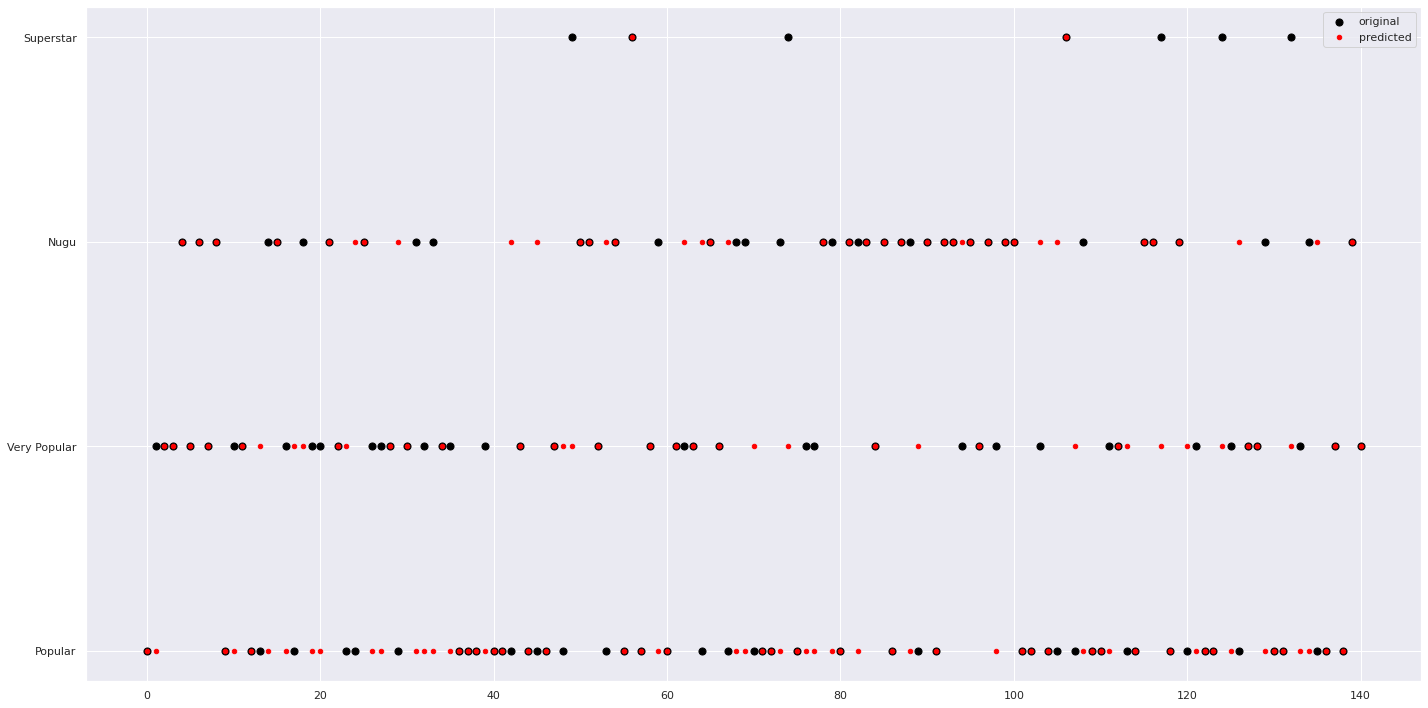

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.scatter(x_ax, y_test, s=50, color="black", label="original")
plt.scatter(x_ax, y_pr,s=20, color="red", label="predicted")
plt.legend()
plt.show()

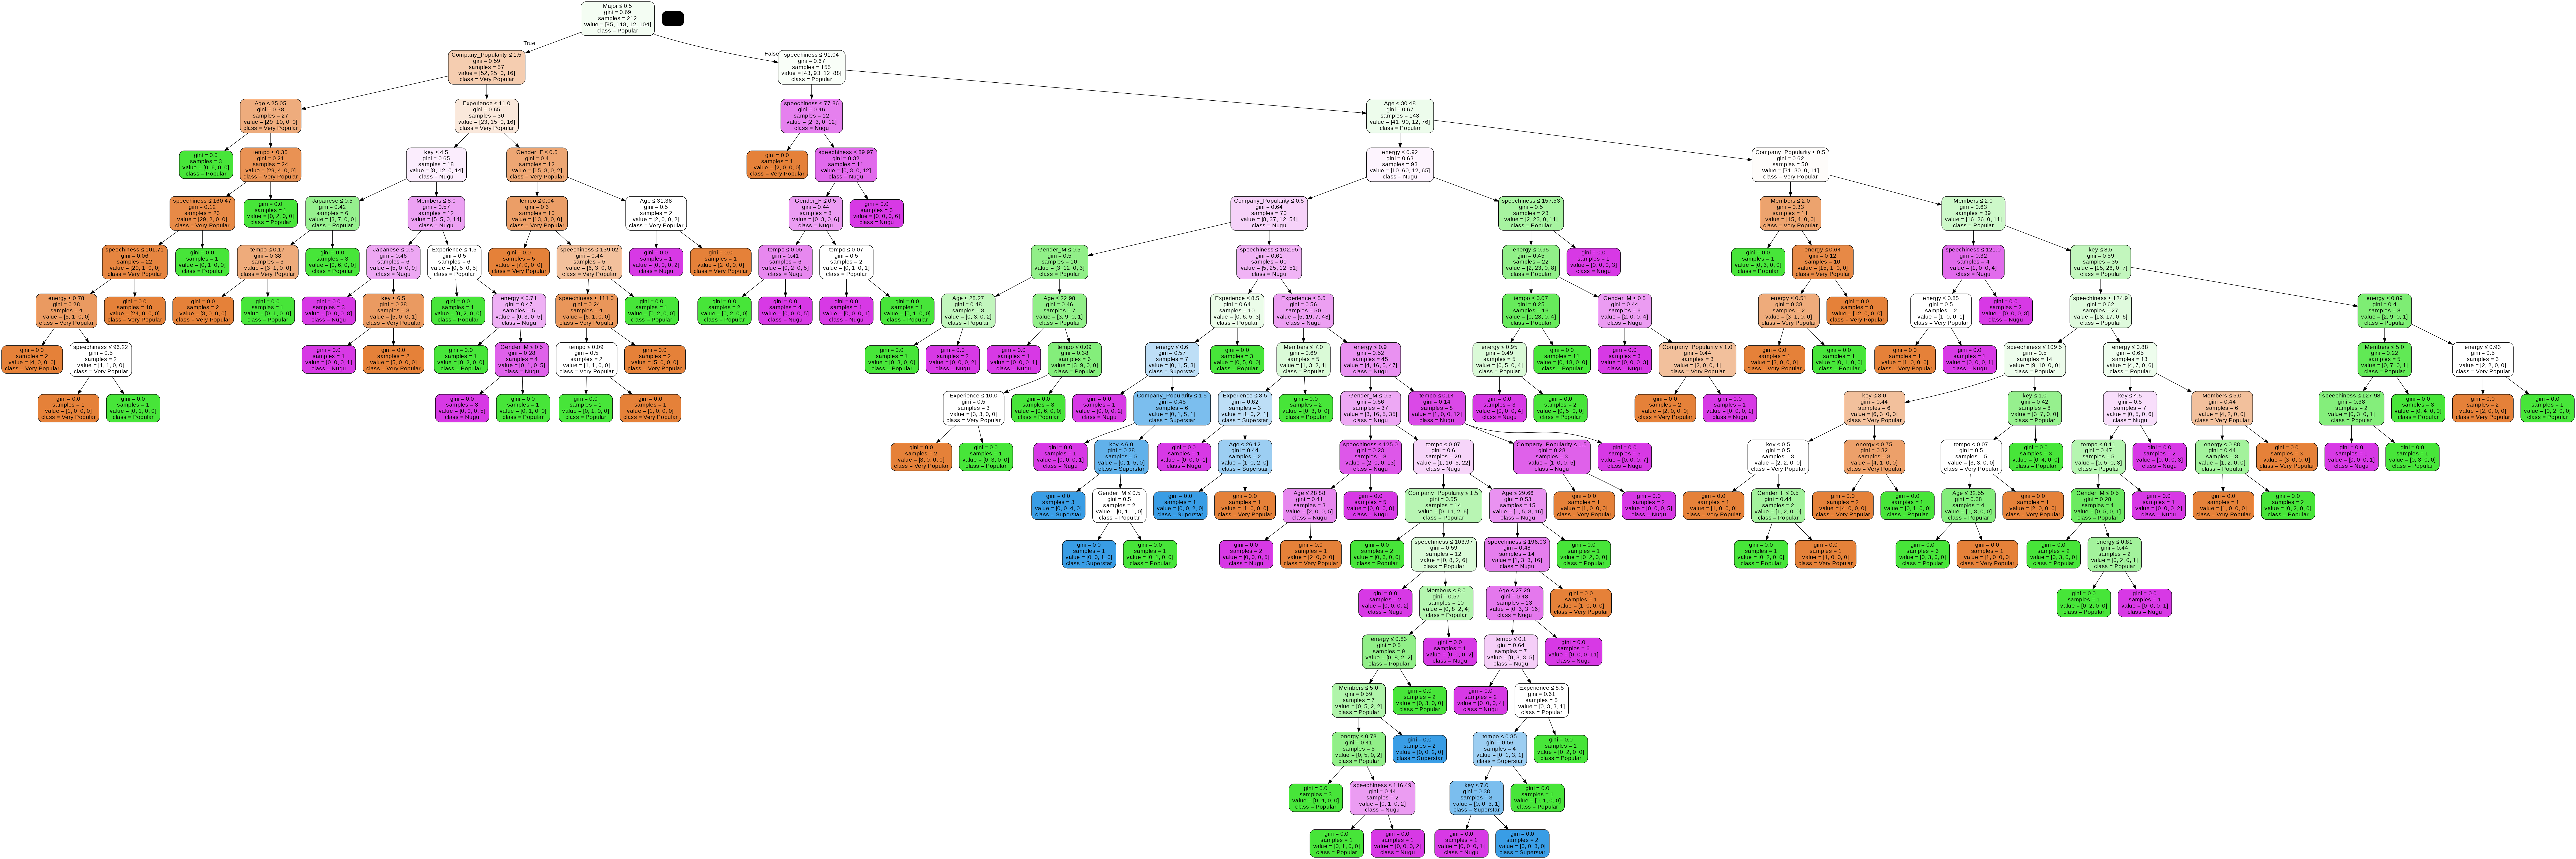

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
estimator = RF.estimators_[1]
dot_data=export_graphviz(estimator, 
                feature_names = ["Members","Age","Experience","Company_Popularity","Collab","OST","Japanese","English","Chinese","Special","Major","energy","key","tempo","speechiness","time_signature","Gender_F","Gender_M"],
                class_names = ['Very Popular','Popular','Superstar','Nugu'],
                rounded = True, proportion = False, 
                precision = 2, filled = True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"100,400!"')
graph.write_png('resized_tree.png')
from IPython.display import Image
Image(filename='resized_tree.png') 

# *DECISION TREE-Guessing A Small Group of Artists by Youtube Views*

In [ ]:
df = pd.read_csv('fordecisiontree.csv')
df = df.sort_values(by=['Views'],ascending=False)
df

Unnamed: 0 Artist Name       Debut  ... Chinese  Special  Major
1853        1853         psy         NaN  ...       0        0      1
1123        1123   blackpink  2016-08-08  ...       0        0      1
1124        1124   blackpink  2016-08-08  ...       0        0      1
1854        1854         psy         NaN  ...       0        0      1
266          266         bts  2013-06-13  ...       0        0      1
...          ...         ...         ...  ...     ...      ...    ...
1782        1782        ravi         NaN  ...       0        0      1
1785        1785        ravi         NaN  ...       0        0      1
1813        1813        yeri         NaN  ...       0        0      0
1814        1814       jessi         NaN  ...       0        0      1
1831        1831     chungha         NaN  ...       0        0      0

[1907 rows x 27 columns]

We will get the 5 most repeated artists in the Artist column and create a new dataframe

In [ ]:
df['Artist Name'].value_counts()[:5]

ftisland        55
t-ara           38
super junior    37
bigbang         35
shinee          34
Name: Artist Name, dtype: int64

In [ ]:
artist1 = df[df['Artist Name'] == 'ftisland']
artist2 = df[df['Artist Name'] == 't-ara']
artist3 = df[df['Artist Name'] == 'super junior']
artist4 = df[df['Artist Name'] == 'bigbang']
artist5 = df[df['Artist Name'] == 'shinee']

In [ ]:
artist = pd.concat([artist1, artist2, artist3, artist4, artist5], axis=0)

In [ ]:
artist = artist.sort_values(by=['Views'],ascending=False)
artist = artist.drop(["Unnamed: 0","Debut","Company","Orig. Memb.","Gender","Experience","Company_Popularity","Active","Short","Korean Name","Fanclub Name","Age","Type","Release","Video","IsGroup","Collab","OST","Japanese","English","Chinese","Song Name","Special","Major"], axis=1)
artist = artist[artist['Views'].notna()]
artist["Artist Name"] = artist["Artist Name"].str.strip()

In [ ]:
artist

Artist Name  Members        Views
143        bigbang      4.0  573676677.0
148        bigbang      4.0  499455000.0
160        bigbang      4.0  232242622.0
158        bigbang      4.0  207650826.0
790   super junior     11.0  206199741.0
...            ...      ...          ...
427       ftisland      4.0     241024.0
1609         t-ara      4.0     217524.0
394       ftisland      4.0     199322.0
1614         t-ara      4.0     157216.0
1605         t-ara      4.0     105255.0

[194 rows x 3 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = artist[['Views','Members']]
y = artist[['Artist Name']] #we're going to predict the artists
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle = True, random_state=0)


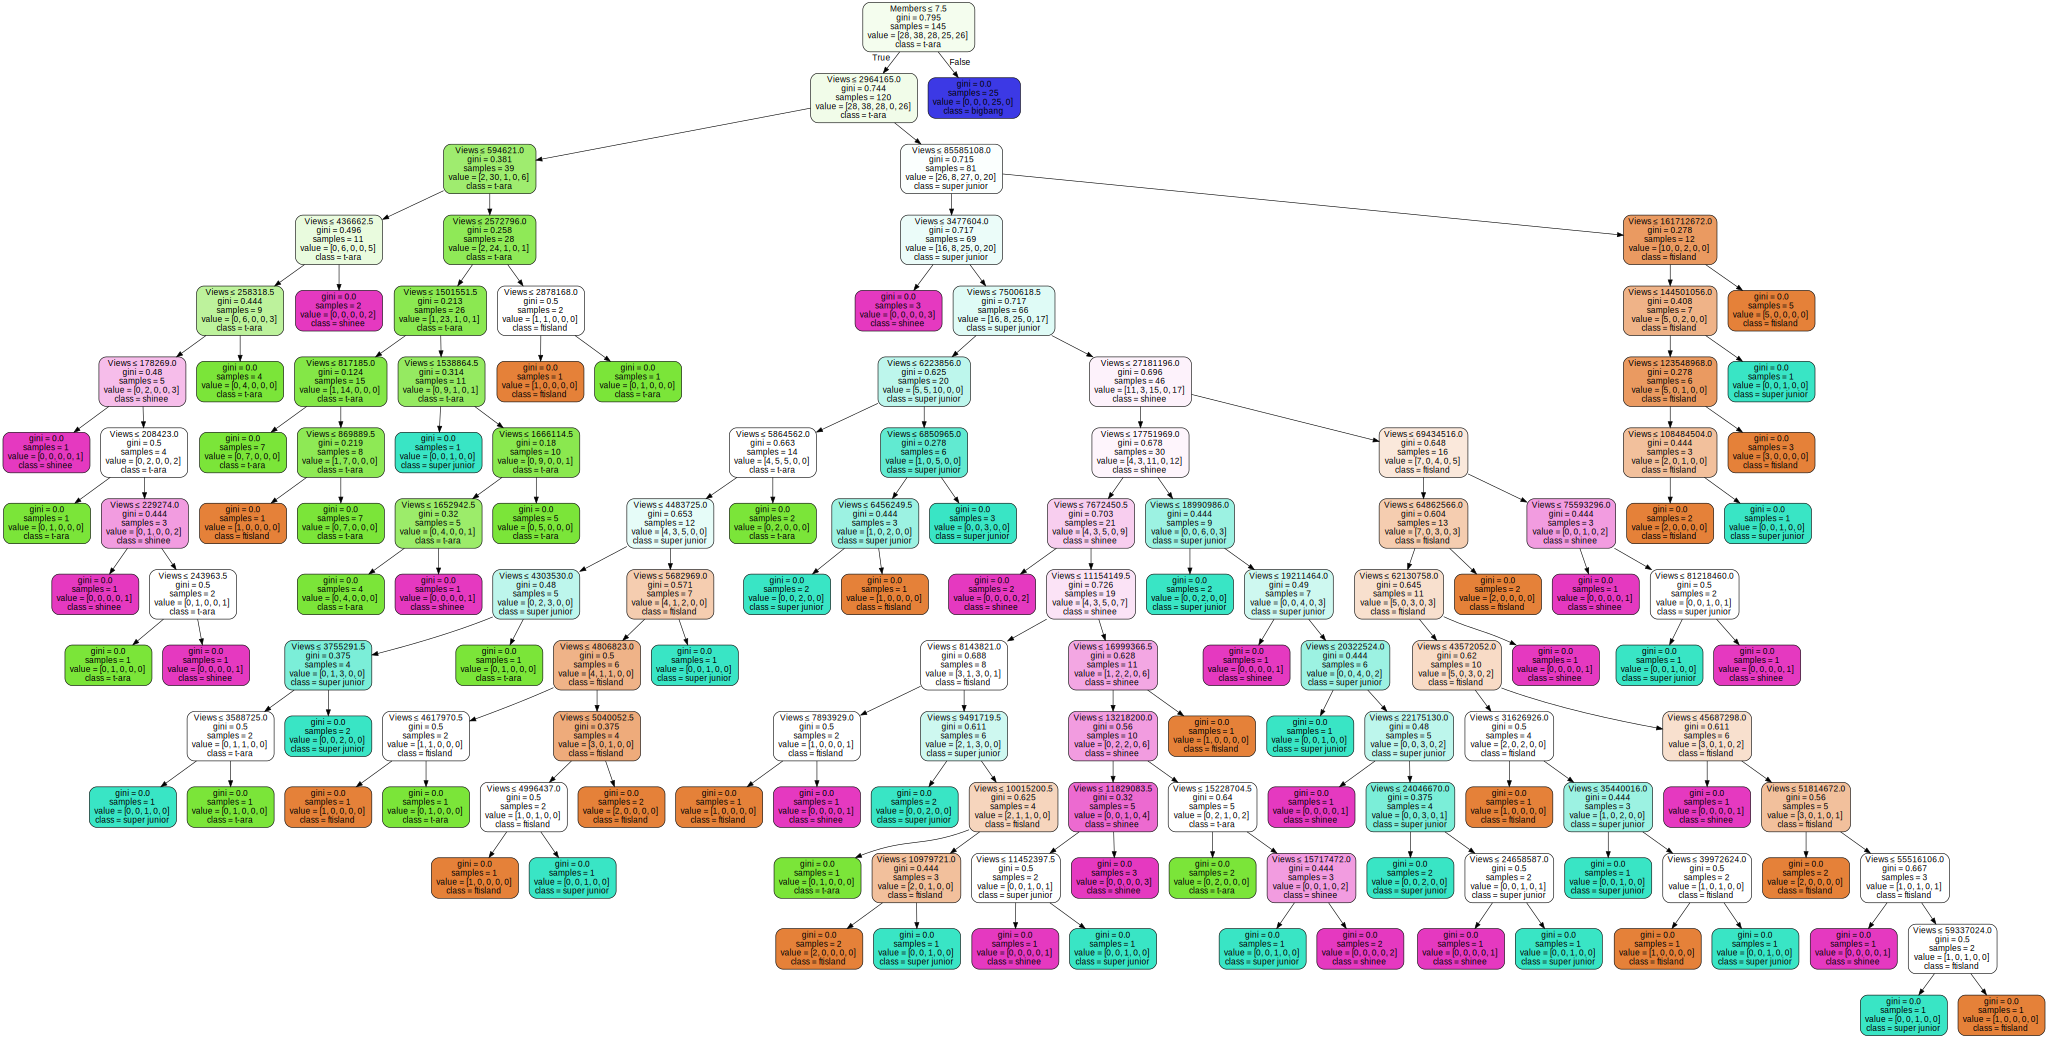

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(X_train,y_train)
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=['Views','Members'], class_names=['ftisland', 't-ara', 'super junior','bigbang','shinee'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
pred = decision_tree_model.predict(X_test)
pred

array(['super junior', 'ftisland', 'super junior', 'super junior',
       'super junior', 'bigbang', 'bigbang', 'ftisland', 'ftisland',
       'bigbang', 'bigbang', 'shinee', 'ftisland', 't-ara', 'ftisland',
       'super junior', 't-ara', 't-ara', 't-ara', 'super junior',
       'ftisland', 'ftisland', 'super junior', 'shinee', 't-ara', 't-ara',
       't-ara', 'shinee', 'super junior', 'ftisland', 'shinee', 'bigbang',
       'shinee', 'super junior', 'super junior', 't-ara', 'bigbang',
       'ftisland', 't-ara', 'shinee', 'ftisland', 'super junior',
       'bigbang', 'shinee', 'ftisland', 'shinee', 'bigbang',
       'super junior', 't-ara'], dtype=object)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
acc= accuracy_score(pred, y_test)
print('Accuracy: %.3f' % acc)

Accuracy: 0.653


In [ ]:
#confusion matrix for the predictions
from sklearn import metrics
metrics.confusion_matrix(pred,y_test)

array([[ 5,  1,  1,  0,  1],
       [ 0,  8,  0,  0,  3],
       [ 2,  2,  3,  0,  1],
       [ 0,  0,  0, 12,  0],
       [ 0,  6,  0,  0,  4]])

In [ ]:
#Precision
from sklearn.metrics import precision_score
precision = precision_score(pred, y_test, average='micro')
print('Precision: %.3f' % precision)

Precision: 0.653


In [ ]:
#f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred, average='micro')
print('f1 score: %.3f' % f1)

f1 score: 0.653
